# Correr, el ejercicio más completo - C312

Integrantes:
- David Lezcano Becerra
- Alfredo Nuño Oquendo

## Cargar los datos

In [2]:
import pandas as pd

# Ruta del primer archivo CSV
file_path1 = 'dailyActivity3-4.csv'

# Ruta del segundo archivo CSV
file_path2 = 'dailyActivity4-5.csv'

# Cargar el primer archivo CSV en un DataFrame
df1 = pd.read_csv(file_path1)

# Cargar el segundo archivo CSV en otro DataFrame
df2 = pd.read_csv(file_path2)

# Concatenar df2 al final de df1
df = pd.concat([df1, df2], ignore_index=True)

# Seleccionar todas las columnas excepto 'TrackerDistance', 'Date' y 'LoggedActivitiesDistance'
df = df.drop(columns=['Id', 'TrackerDistance', 'LoggedActivitiesDistance', 'ActivityDate'])

# Identificar las filas donde 'TotalSteps' es igual a 0 porque no nos interesan las personas que no corrieron nada
rows_to_drop = df[df['TotalSteps'] == 0].index

# Eliminar esas filas del DataFrame
df = df.drop(rows_to_drop)

# Obtener los nombres de las columnas como un array
column_names = df.columns.to_list()


Nuestro dataset tomado del sitio web *kaggle.com* describe en una carrera donde participaron corredores profesionales y personas promedio, los distintos momentos para cada uno según el nivel de intensidad al que corrieron, el tiempo que se tomaron para cada nivel de intensidad y la cantidad de calorias quemadas. Las variables estudiadas son:
- TotalSteps
- TotalDistance

- VeryActiveDistance
- ModeratelyActiveDistance
- LightActiveDistance
- SedentaryActiveDistance

- VeryActiveMinutes
- FairlyActiveMinutes
- LightlyActiveMinutes
- SedentaryMinutes

- Calories

Para un mejor análisis agregamos a nuestro dataset dos nuevas columnas:
- TotalMinutes: suma de las variables de tiempos de los distintos niveles de intensidad
- Velocidad: la tomamos como la velocidad media por cada observación, o sea, la distancia recorrida en total dividida por el tiempo total que anterirmente agregamos

In [3]:
import pandas as pd

# Añadir los minutos totales
df['TotalMinutes'] = df['VeryActiveMinutes'] + df['FairlyActiveMinutes'] + df['LightlyActiveMinutes'] + df['SedentaryMinutes']

# Añadir velocidad
df['Velocidad'] = df['TotalDistance'] / df['TotalMinutes']

pd.set_option('display.float_format', '{:.3f}'.format)
df.describe()

,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,Velocidad
count,1259.000,1259.000,1259.000,1259.000,1259.000,1259.000,1259.000,1259.000,1259.000,1259.000,1259.000,1259.000,1259.000
mean,8078.963,5.792,1.551,0.597,3.543,0.002,21.768,14.348,205.692,951.506,2337.014,1193.314,0.005
std,4870.241,3.793,2.703,0.894,1.932,0.008,32.668,20.511,101.261,290.430,730.941,276.732,0.003
min,4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,50.000,2.000,0.000
25%,4499.500,3.060,0.000,0.000,2.180,0.000,0.000,0.000,141.000,720.000,1848.500,981.000,0.003
50%,7640.000,5.410,0.320,0.270,3.530,0.000,5.000,8.000,206.000,1011.000,2202.000,1334.000,0.005
75%,10991.500,7.790,2.125,0.820,4.870,0.000,33.000,20.000,270.500,1189.000,2818.500,1440.000,0.007
max,36019.000,28.030,21.920,6.480,12.510,0.110,210.000,143.000,720.000,1440.000,4900.000,1440.000,0.019


## Mostrar histograma con los datos

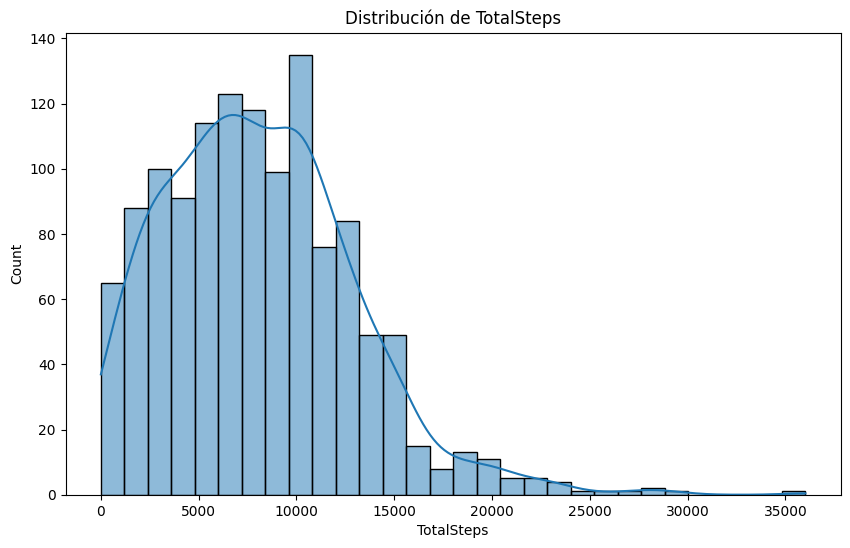

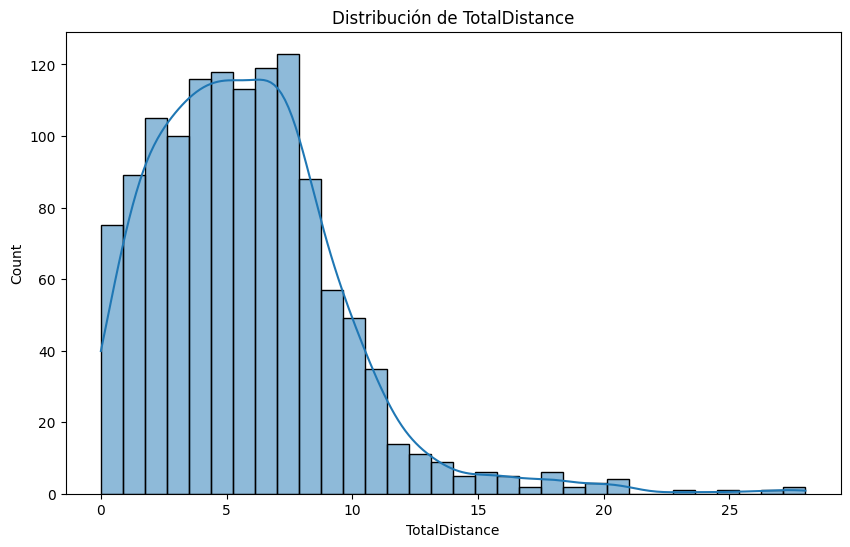

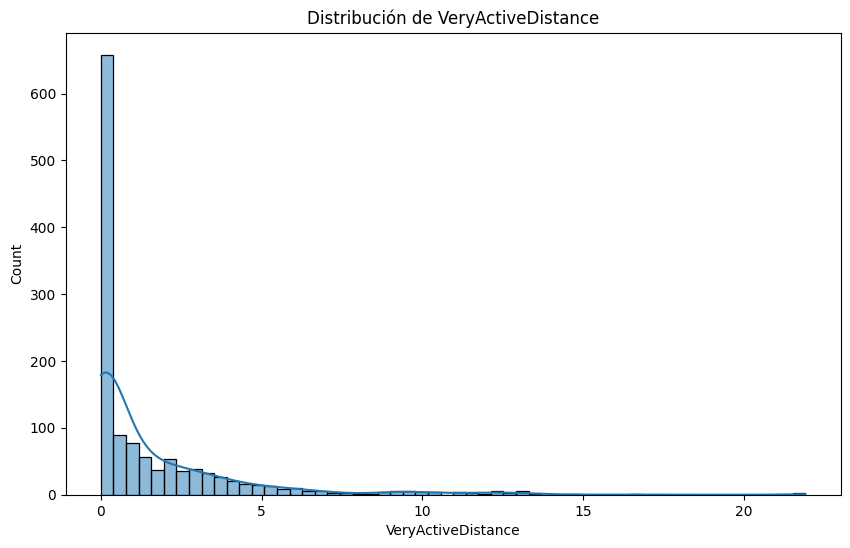

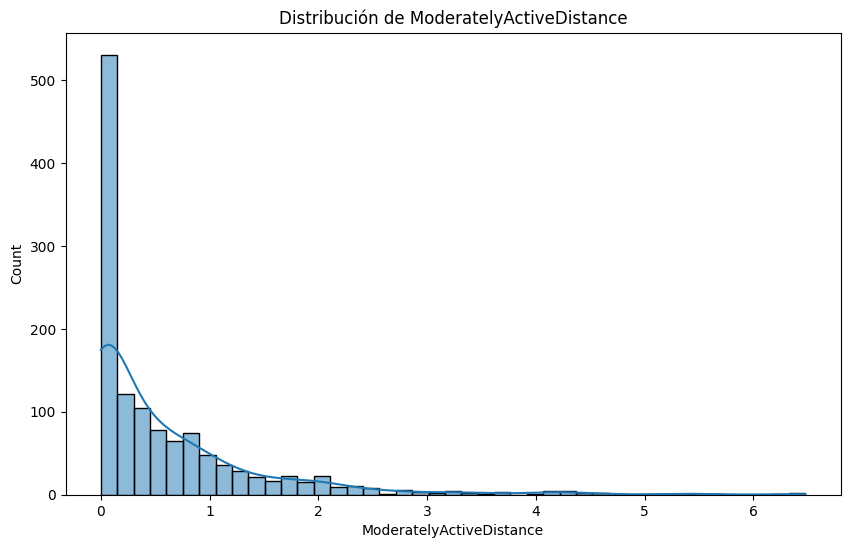

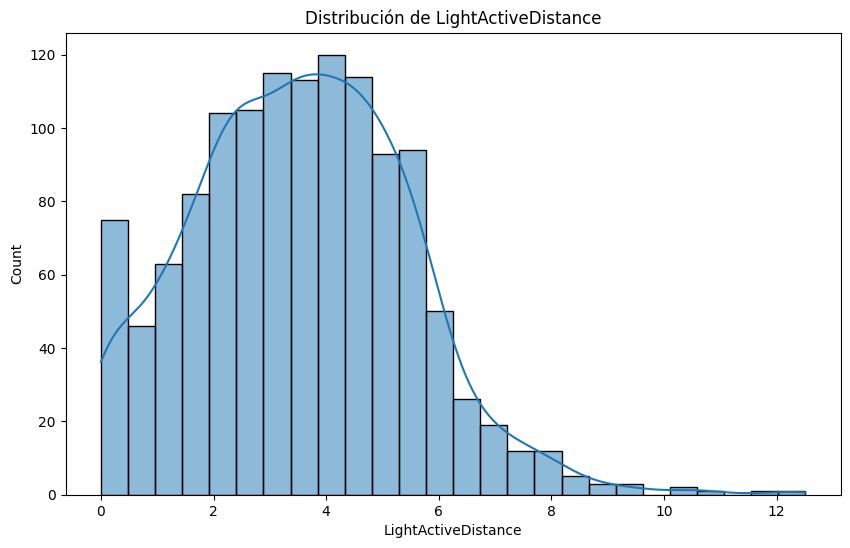

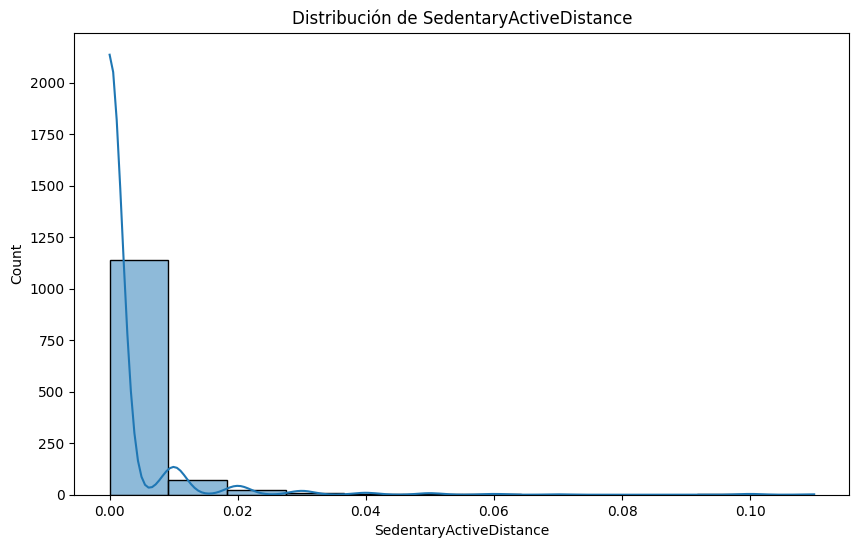

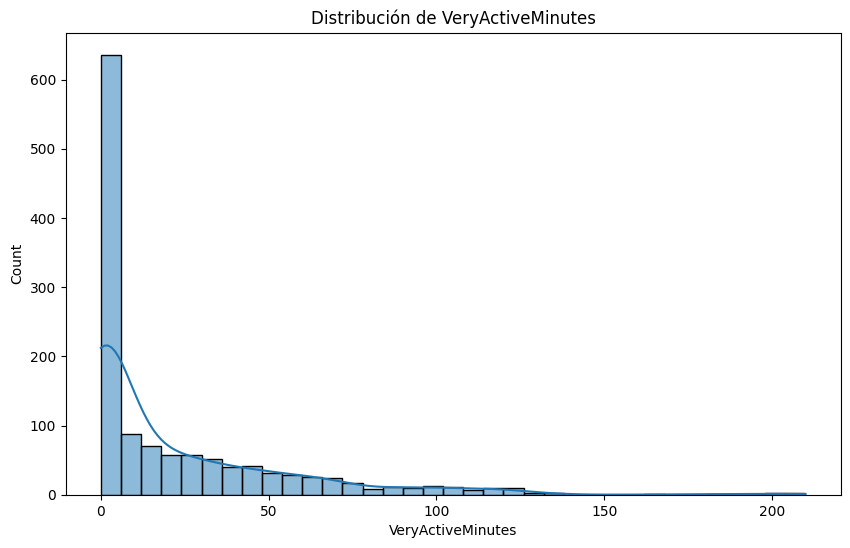

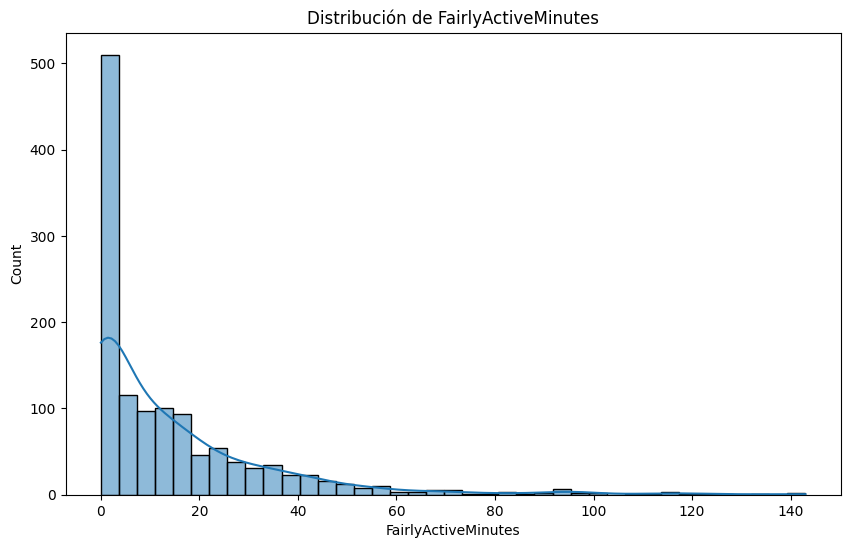

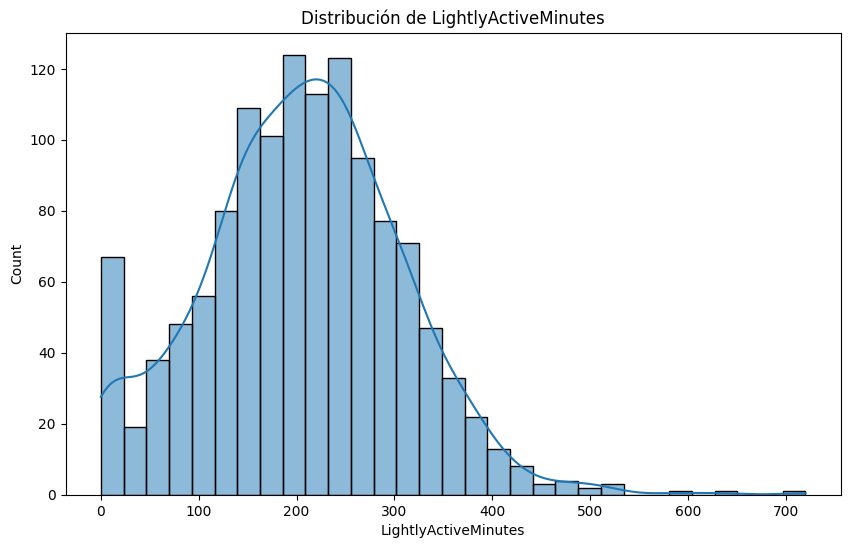

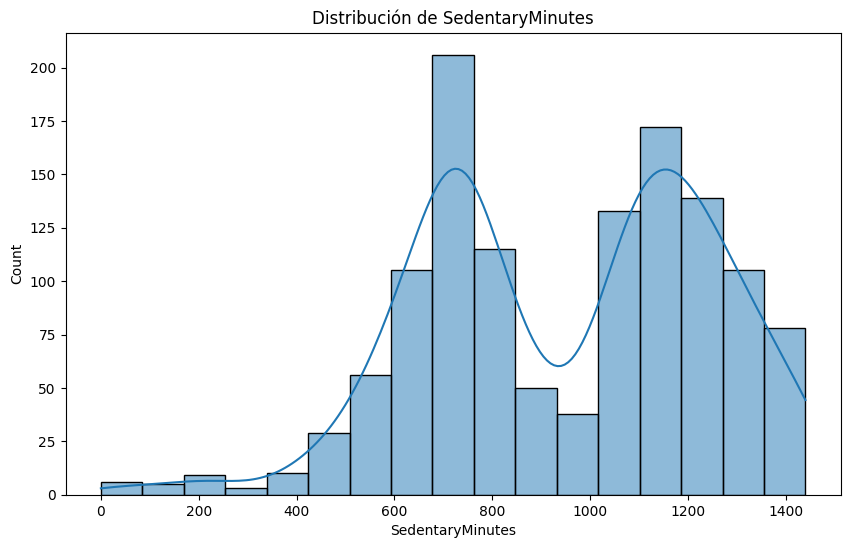

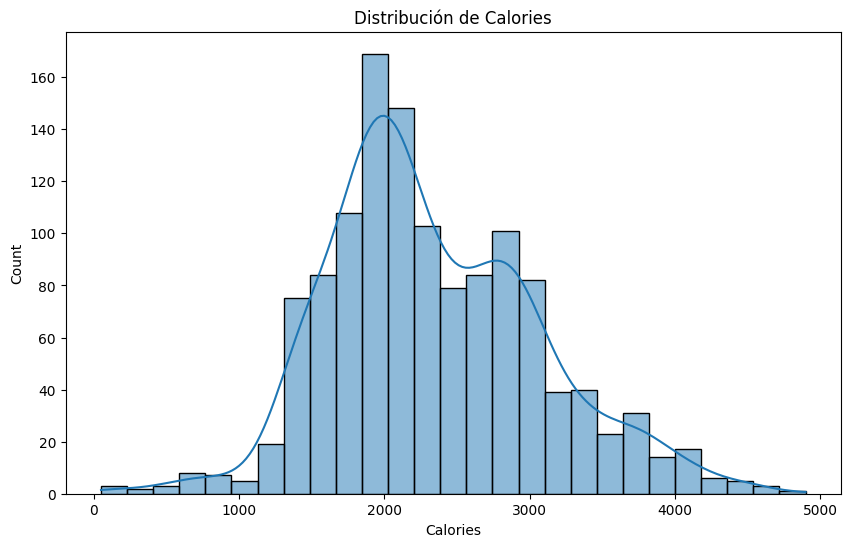

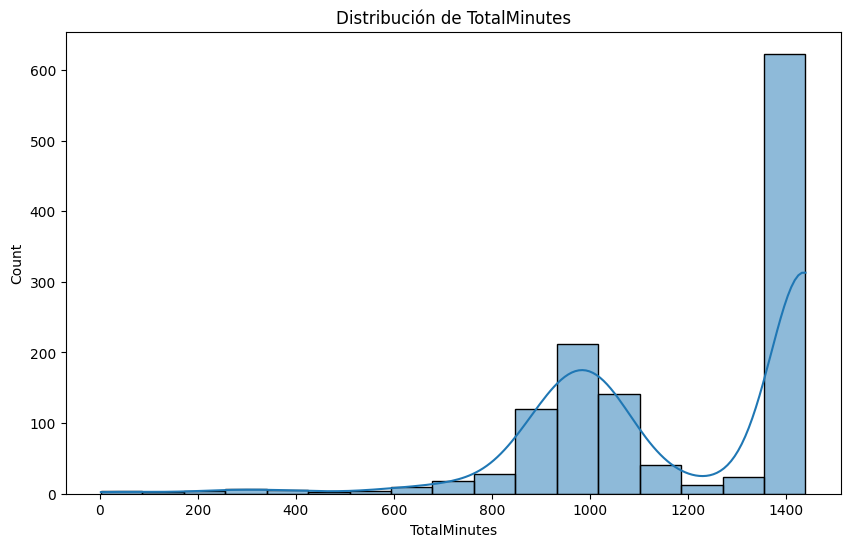

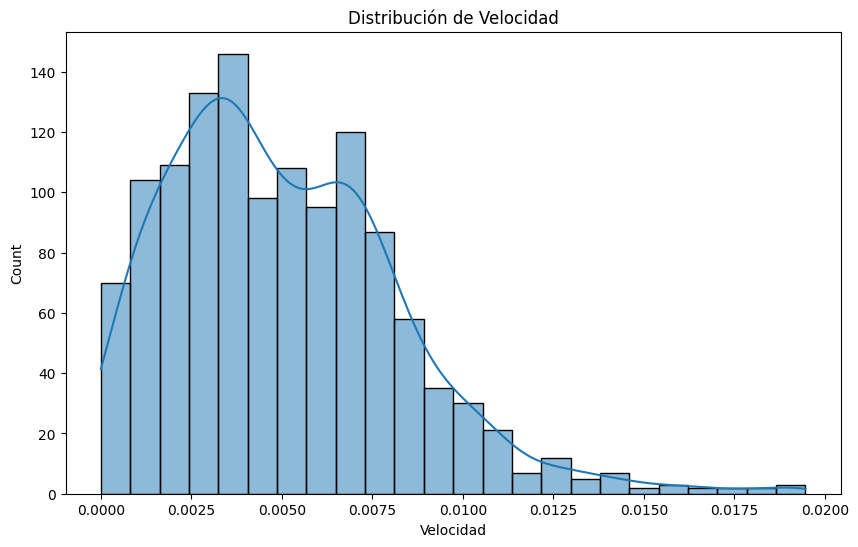

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
# Asegúrate de que 'df' es tu DataFrame
for column in df.columns:
    plt.figure(figsize=(10, 6)) # Ajusta el tamaño de la figura
    sns.histplot(df[column], kde=True) # Crea un histograma con una línea de densidad
    plt.title(f'Distribución de {column}') # Título del gráfico
    plt.show() # Muestra el gráfico

Como podemos apreciar, ninguna de nuestras variables tiene un comportamiento normal

## Limpieza de datos

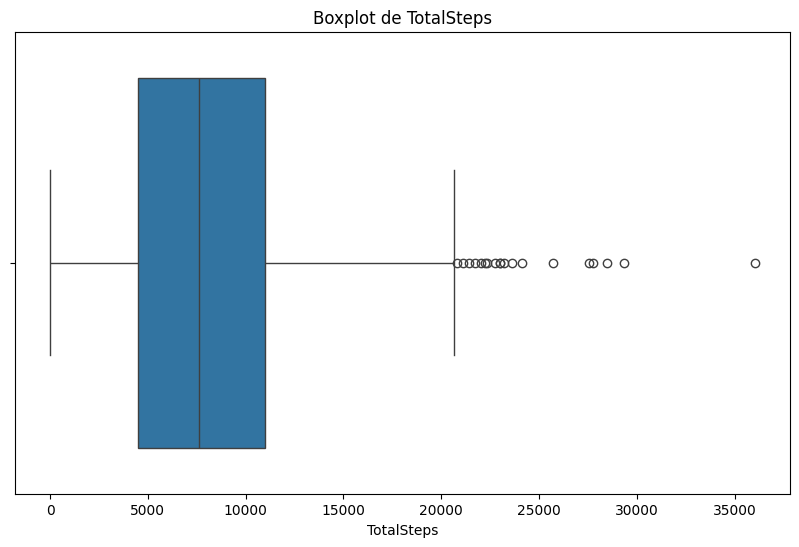

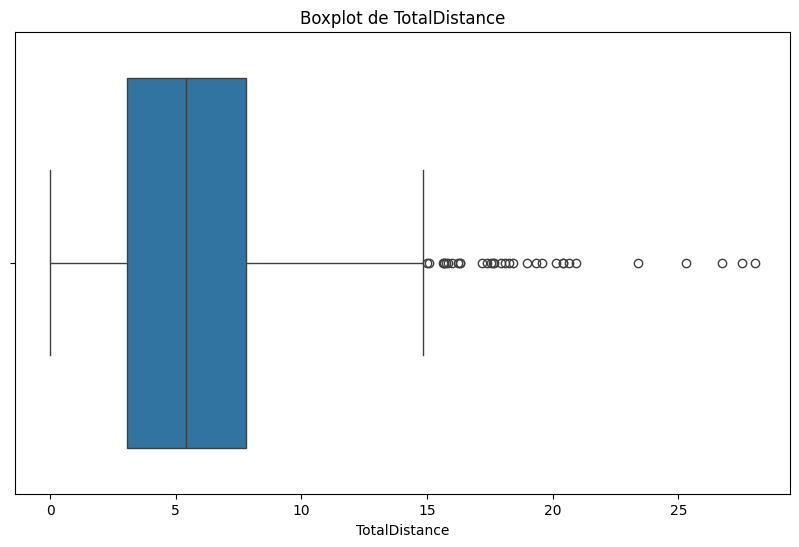

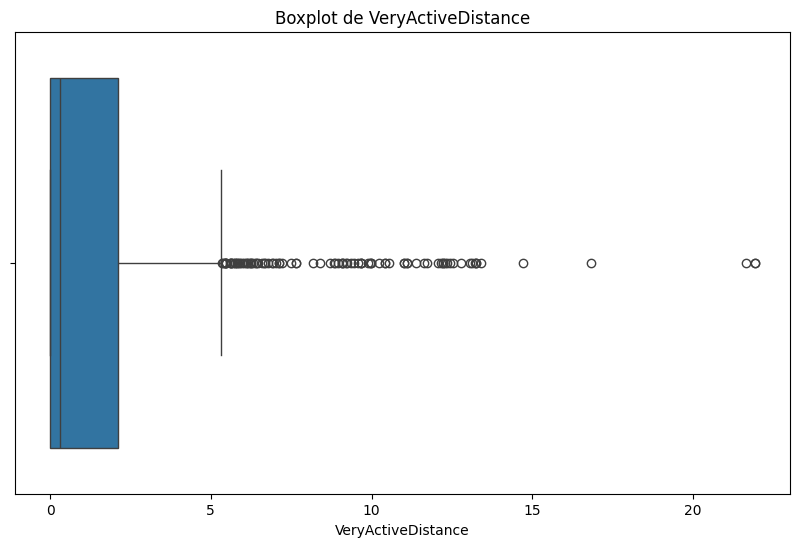

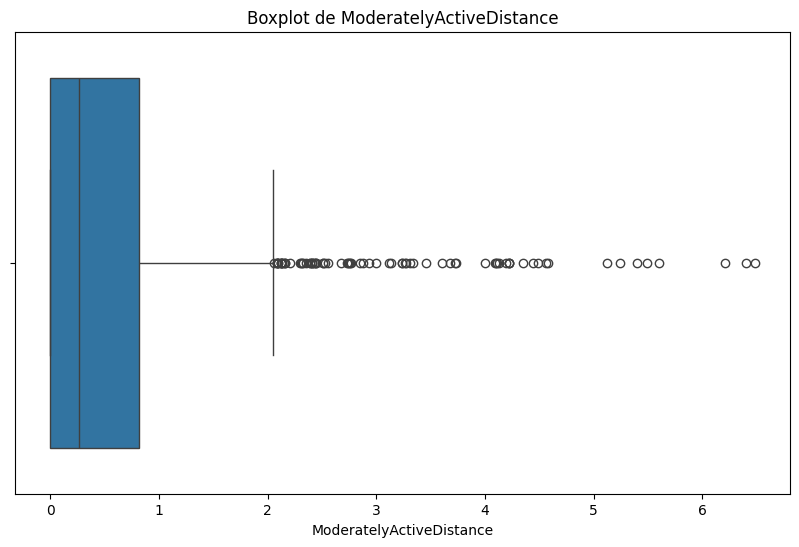

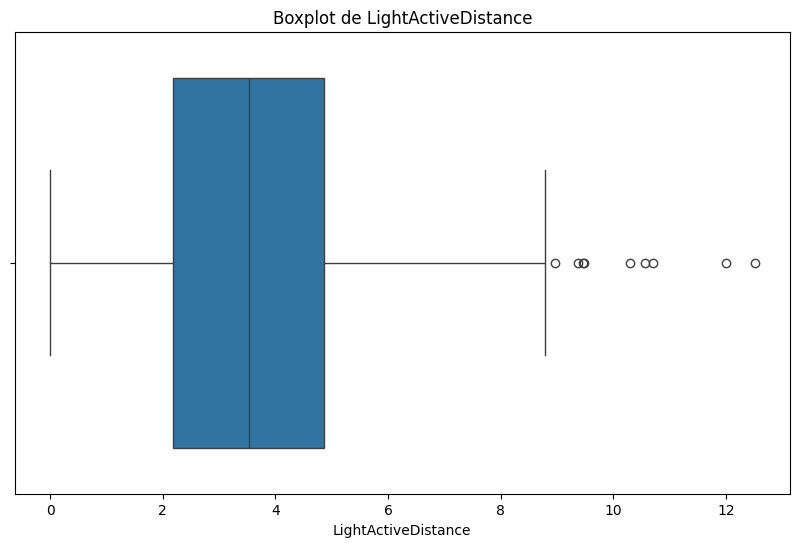

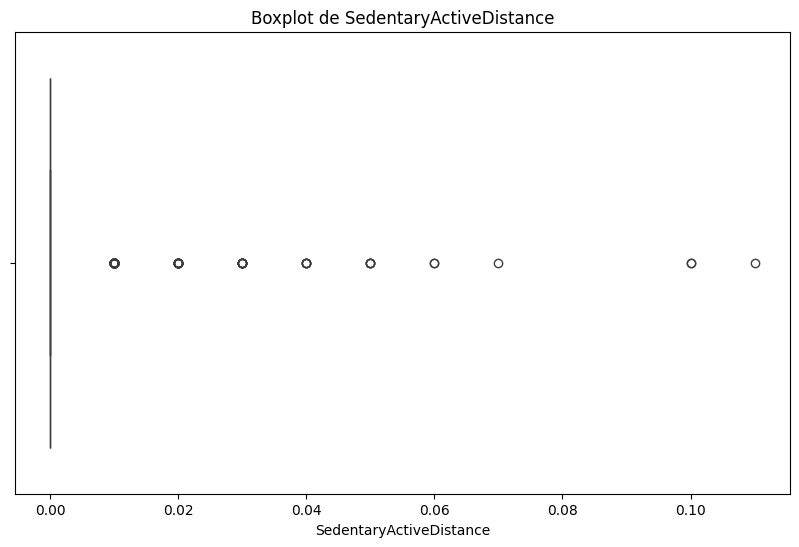

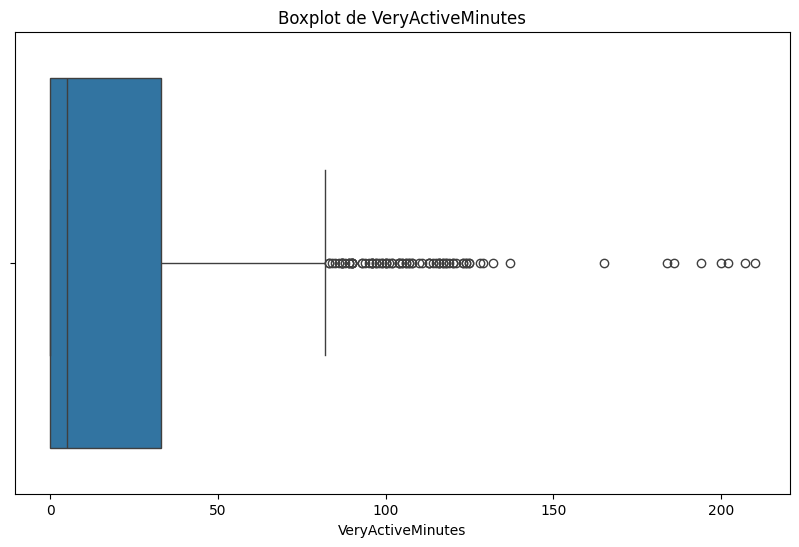

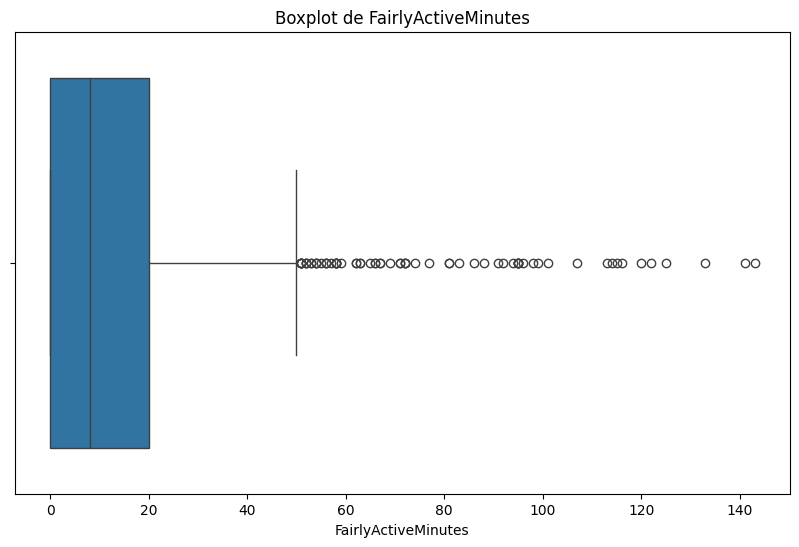

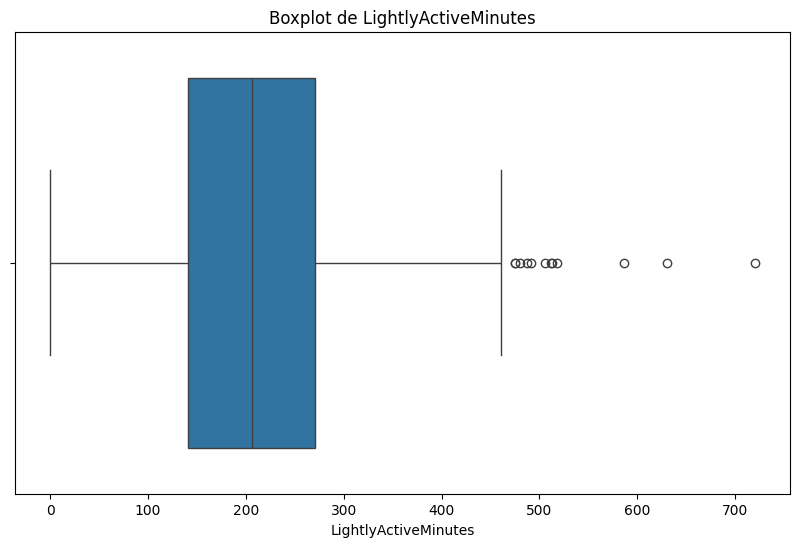

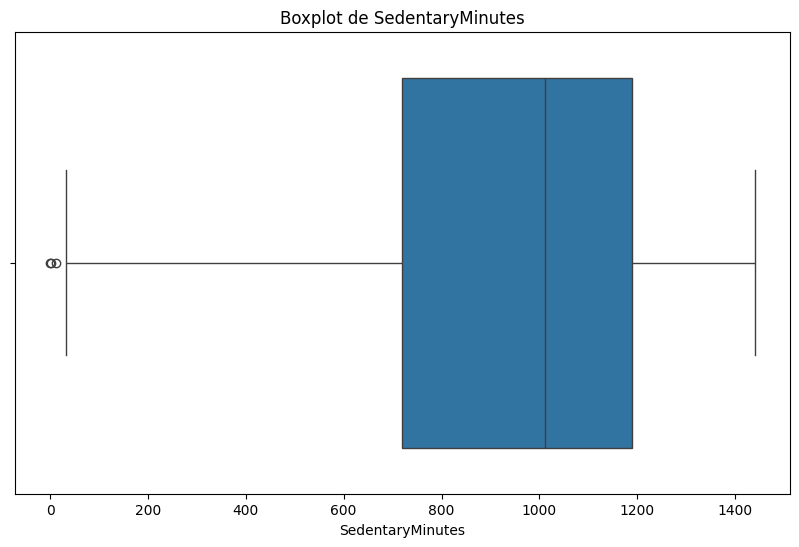

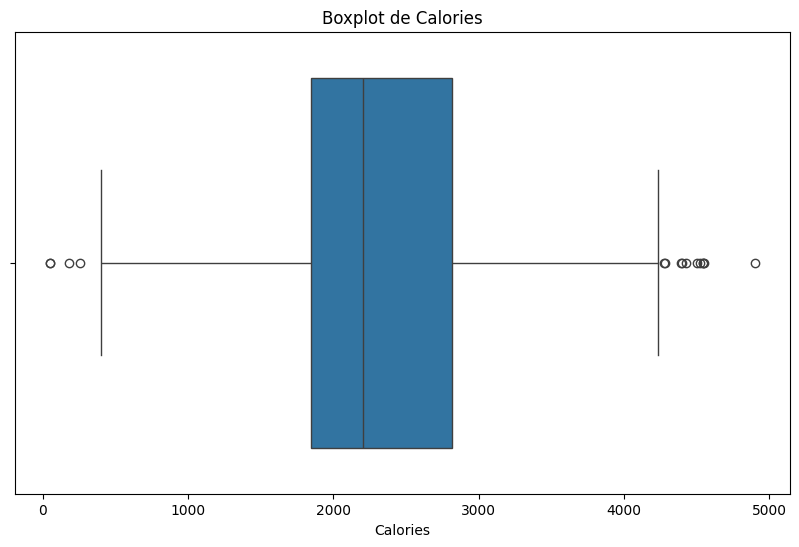

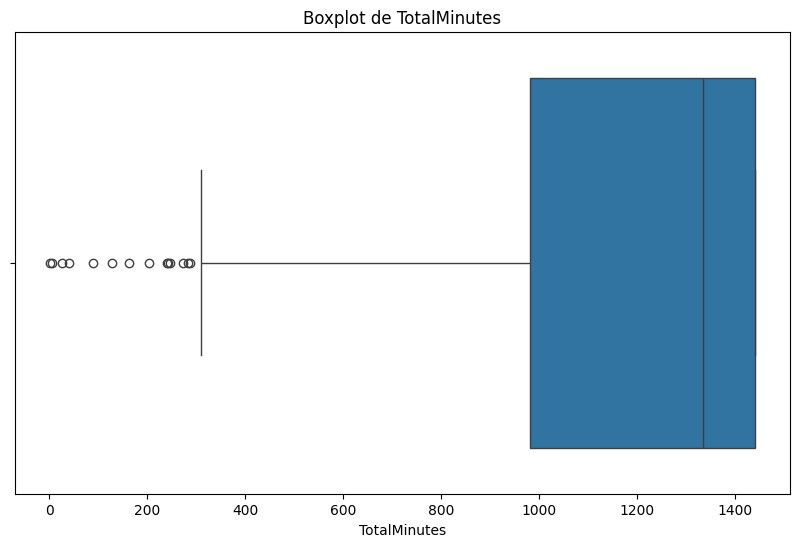

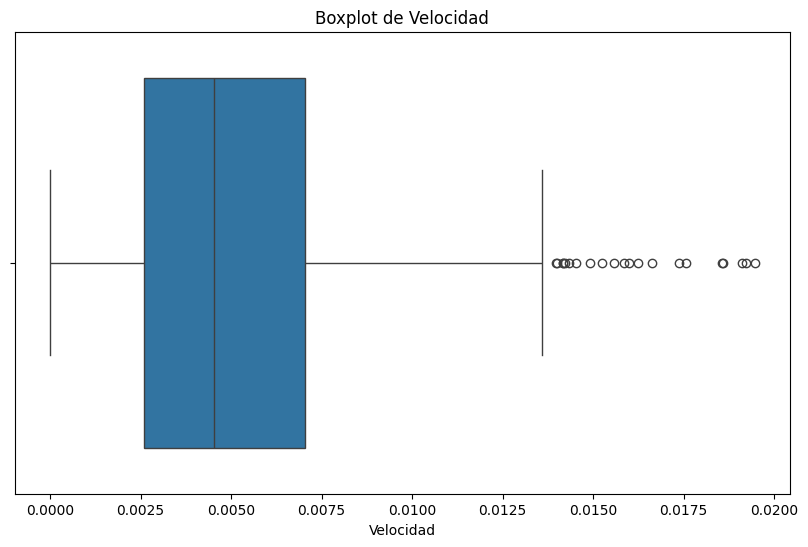

C:\Users\AlfreditoPC\AppData\Local\Temp\ipykernel_14036\2976230722.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-5238.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_clean.loc[df[column] < (Q1 - 1.5 * IQR), column] = Q1 - 1.5 * IQR
C:\Users\AlfreditoPC\AppData\Local\Temp\ipykernel_14036\2976230722.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-49.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_clean.loc[df[column] < (Q1 - 1.5 * IQR), column] = Q1 - 1.5 * IQR
C:\Users\AlfreditoPC\AppData\Local\Temp\ipykernel_14036\2976230722.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-53.25' has dtype incompatible with int64, please explicitl

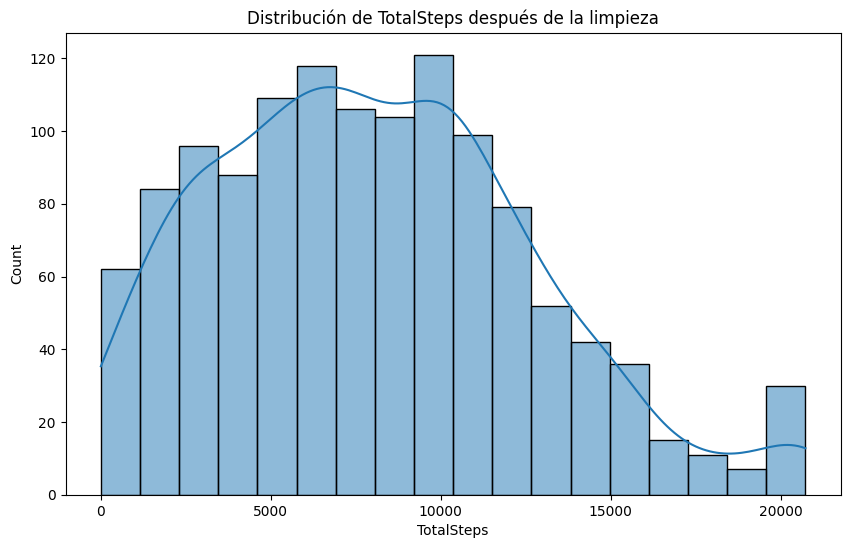

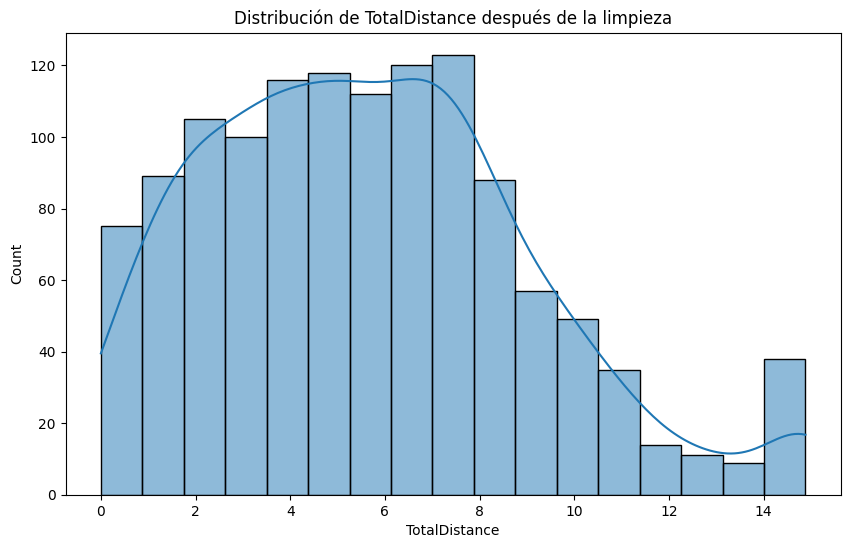

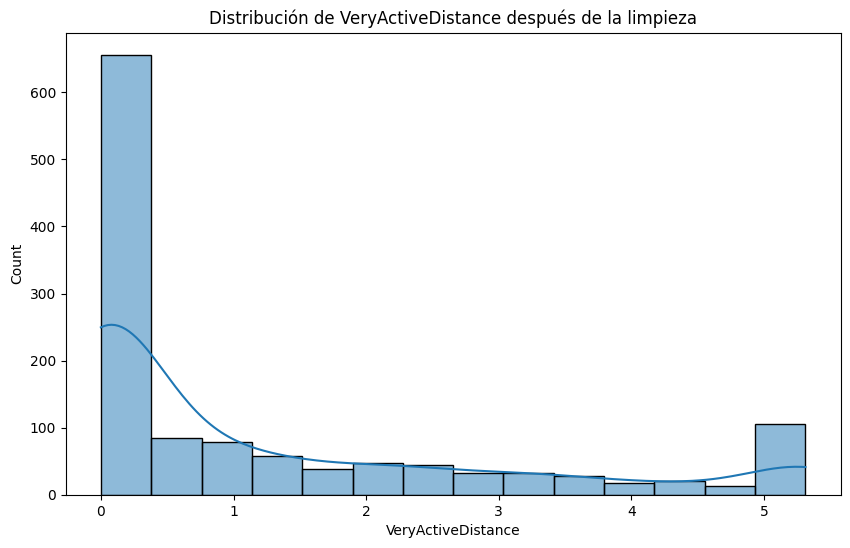

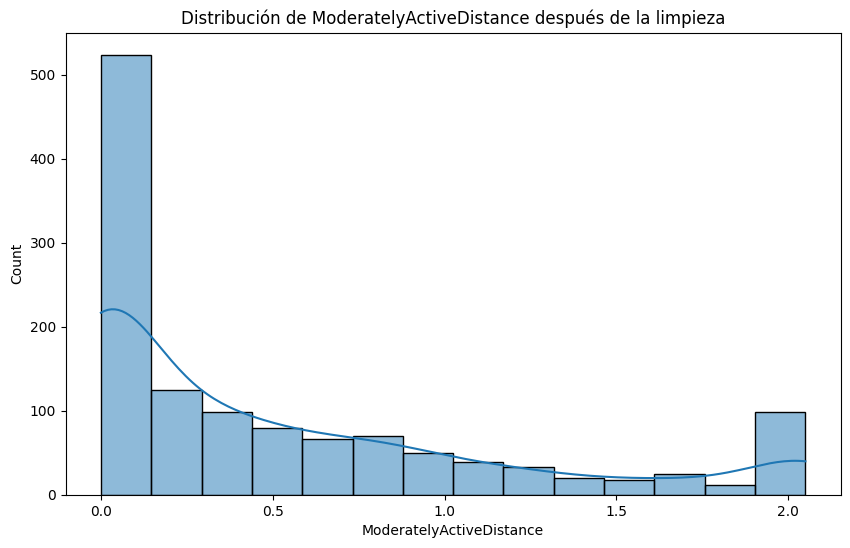

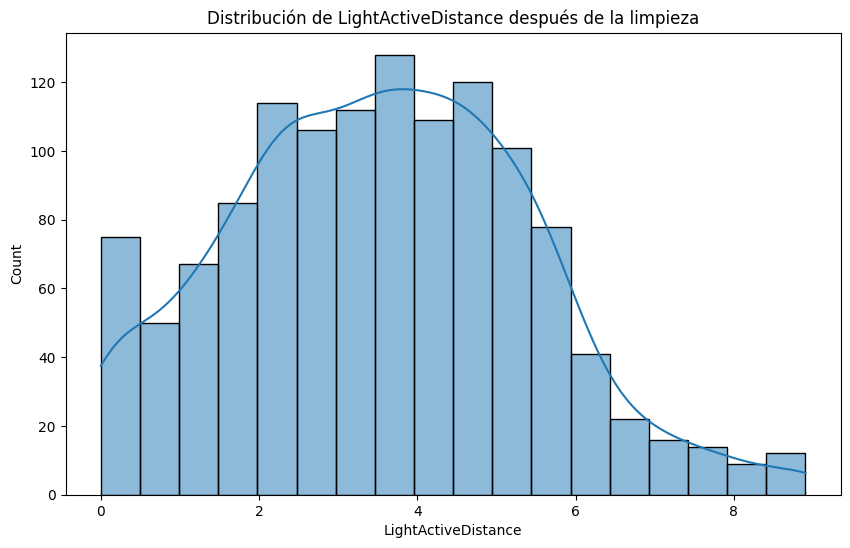

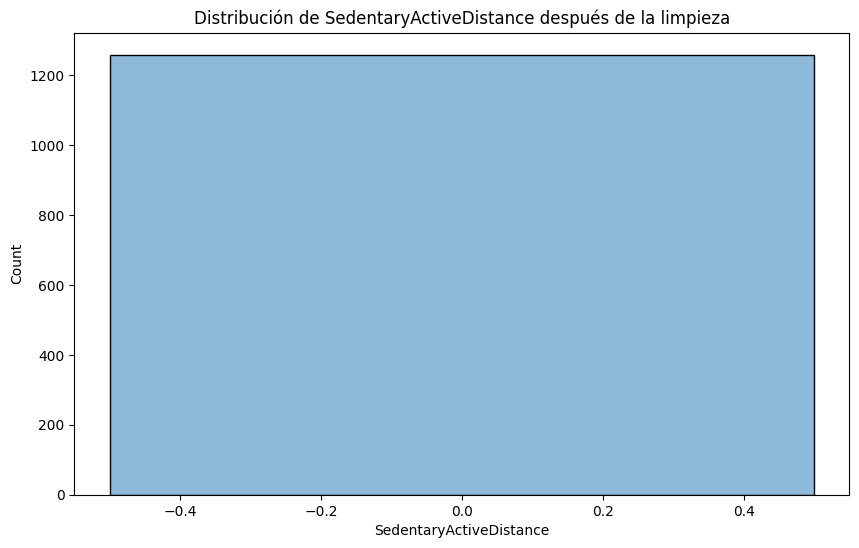

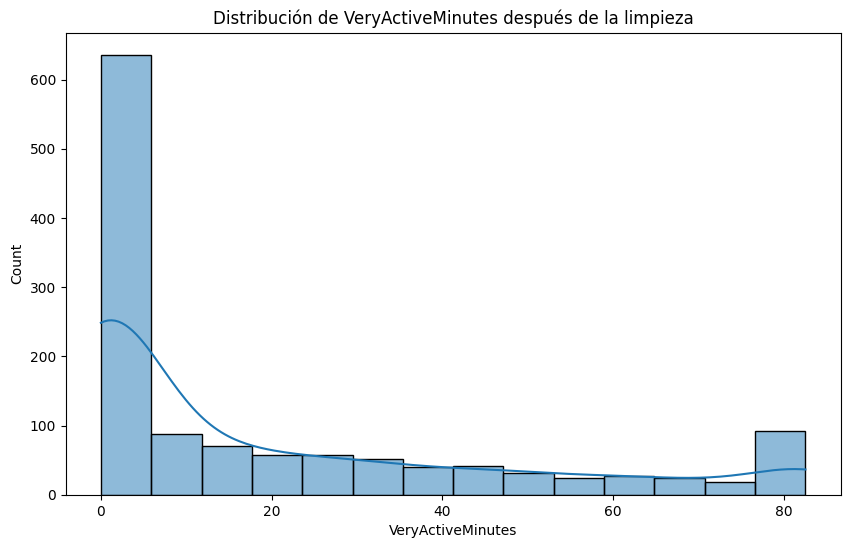

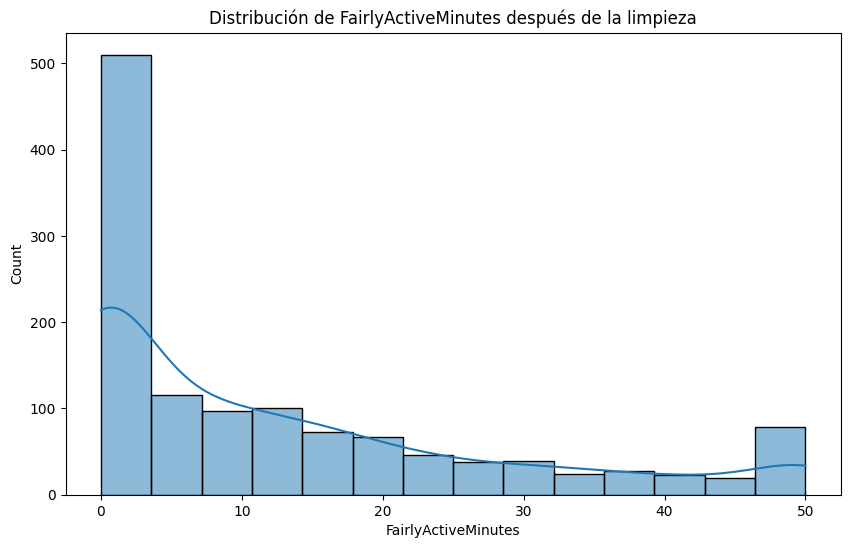

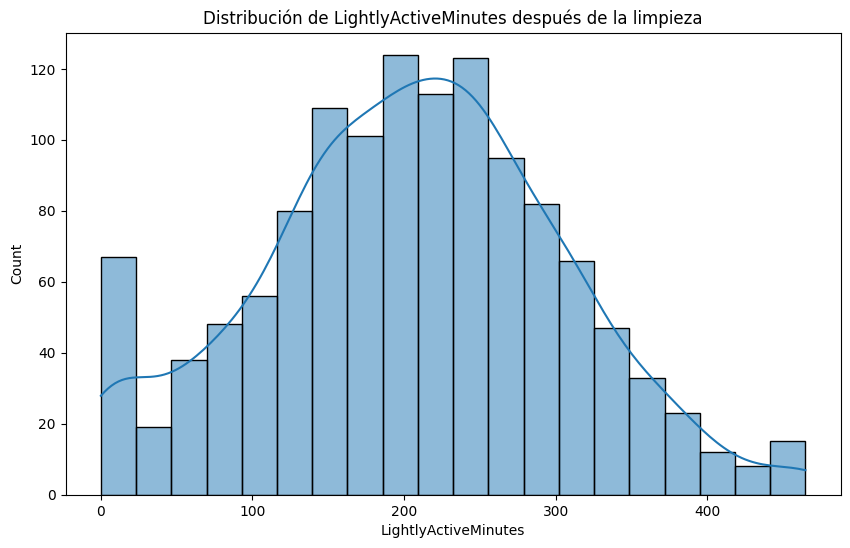

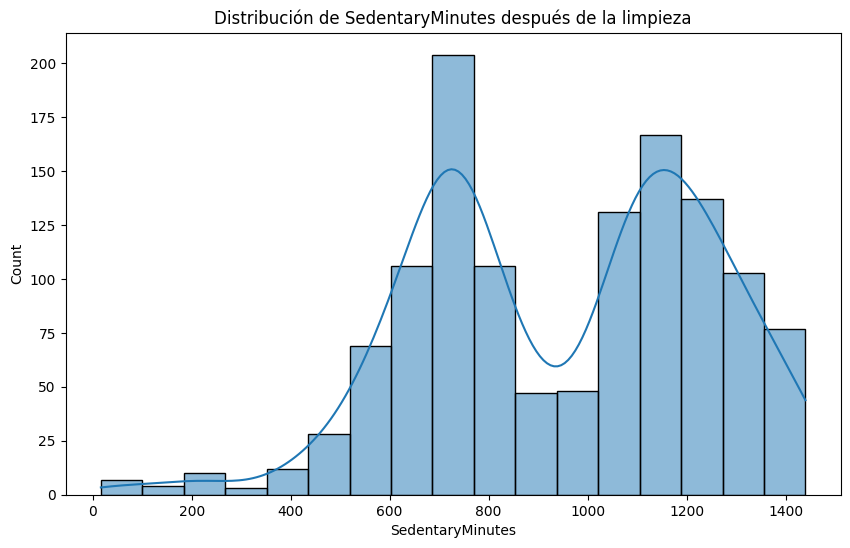

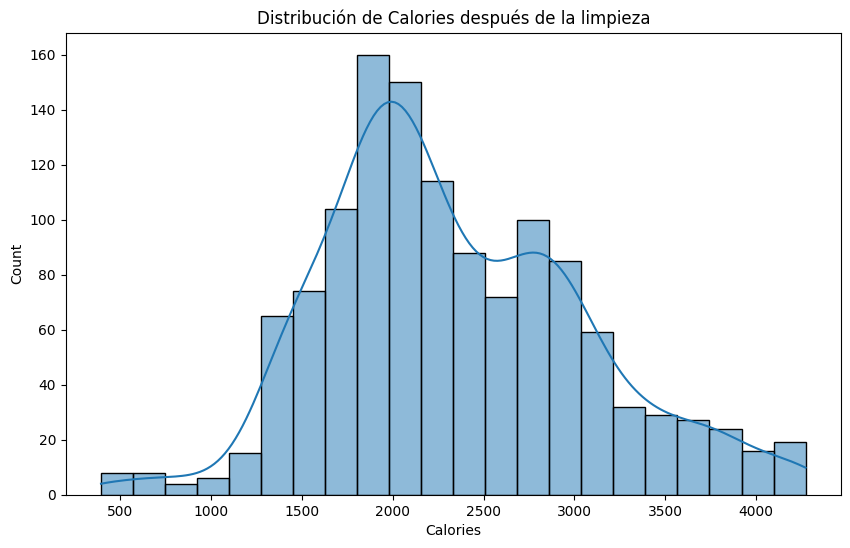

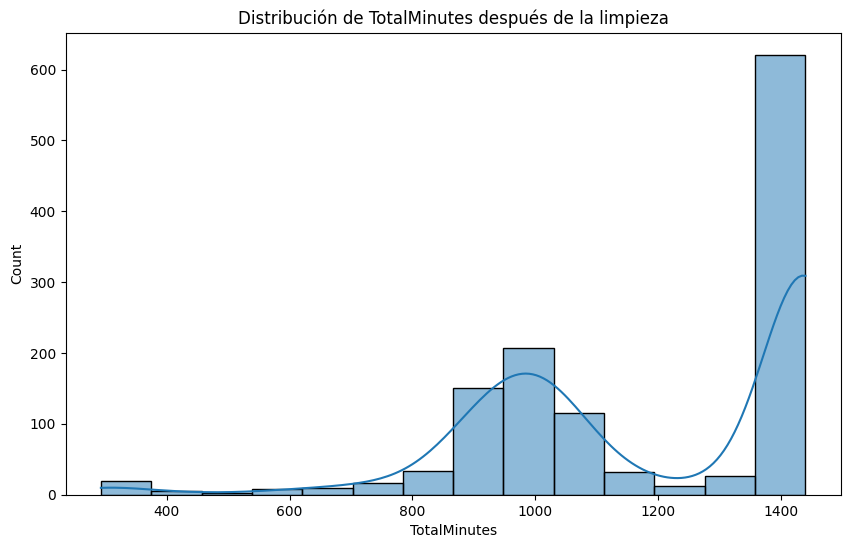

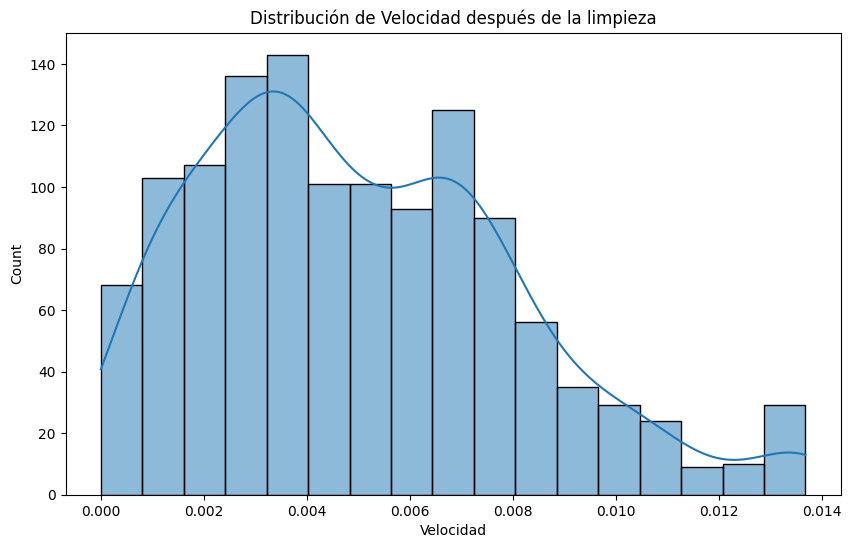

In [6]:
for column in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot de {column}')
    plt.show()  

# Reemplazar outliers con el valor mínimo o máximo dentro del rango de IQR
df_clean = df.copy()
for column in df.columns:
    if df[column].dtype == 'float64' or df[column].dtype == 'int64':
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        df_clean.loc[df[column] < (Q1 - 1.5 * IQR), column] = Q1 - 1.5 * IQR
        df_clean.loc[df[column] > (Q3 + 1.5 * IQR), column] = Q3 + 1.5 * IQR

 
for column in df_clean.columns:
    plt.figure(figsize=(10, 6))  
    sns.histplot(df_clean[column], kde=True) 
    plt.title(f'Distribución de {column} después de la limpieza') 
    plt.show() 

## Análisis de normalidad

In [7]:
df = df_clean
for x in df.columns:
    print(f"El kurtosis de {x} es {df[x].kurtosis()}")
    print(f"La Asimetría de {x} es {df[x].skew()}")

El kurtosis de TotalSteps es -0.13411375671791115
La Asimetría de TotalSteps es 0.46601132970031484
El kurtosis de TotalDistance es 0.02537562574122898
La Asimetría de TotalDistance es 0.5627502132620352
El kurtosis de VeryActiveDistance es 0.29285059300761684
La Asimetría de VeryActiveDistance es 1.2701386787501856
El kurtosis de ModeratelyActiveDistance es 0.28910364284685386
La Asimetría de ModeratelyActiveDistance es 1.194436029870718
El kurtosis de LightActiveDistance es -0.2701136834830362
La Asimetría de LightActiveDistance es 0.19448852823721896
El kurtosis de SedentaryActiveDistance es 0.0
La Asimetría de SedentaryActiveDistance es 0.0
El kurtosis de VeryActiveMinutes es 0.20489642157079357
La Asimetría de VeryActiveMinutes es 1.2242892166788695
El kurtosis de FairlyActiveMinutes es 0.22761233183859497
La Asimetría de FairlyActiveMinutes es 1.1476363200411543
El kurtosis de LightlyActiveMinutes es -0.22248575661457393
La Asimetría de LightlyActiveMinutes es 0.00709859224197431

TotalSteps tiene una distribucion con una cola menos pesada y asimetria moderada lo que sugiere que hay valores mas extremos y que la distribucion es mas pesada en la cola. VeryActiveDistance tiene una asimetria alta, lo que indica una distribucion mas asimetrica con mas valores en una cola de distribucion que en la otra.

### Test de Normalidad

In [8]:
from scipy.stats import kstest, shapiro


for x in df.columns:
    test = df[x].sample(100)
    D, p_value = kstest(test, 'norm')
    print(x)    
    print(f"D = {D}")
    print(f"p-value = {p_value}")
    print()

TotalSteps
D = 1.0
p-value = 0.0

TotalDistance
D = 0.8531965779014188
p-value = 1.5531914282144926e-83

VeryActiveDistance
D = 0.5
p-value = 1.213143437181786e-23

ModeratelyActiveDistance
D = 0.5
p-value = 1.213143437181786e-23

LightActiveDistance
D = 0.7797274269459824
p-value = 8.043282031560495e-65

SedentaryActiveDistance
D = 0.5
p-value = 1.213143437181786e-23

VeryActiveMinutes
D = 0.5599683287581669
p-value = 4.484460215825491e-30

FairlyActiveMinutes
D = 0.6486501019683699
p-value = 1.3137348433656183e-41

LightlyActiveMinutes
D = 0.9899683287581669
p-value = 2.743841982214976e-200

SedentaryMinutes
D = 1.0
p-value = 0.0

Calories
D = 1.0
p-value = 0.0

TotalMinutes
D = 1.0
p-value = 0.0

Velocidad
D = 0.500024933893617
p-value = 1.206257825512482e-23



La discrepancia entre los resultados de la prueba de Kolmogorov-Smirnov (K-S) y las medidas de kurtosis y asimetría puede surgir debido a varias razones. La kurtosis y la asimetría son medidas estadísticas que describen la forma de la distribución de una variable, pero no son suficientes por sí solas para determinar si una distribución es normal. La normalidad es una propiedad compleja que se refiere a la forma específica de la distribución, y la K-S es una prueba no paramétrica que evalúa la similitud entre la distribución empírica de una muestra y una distribución teórica (en este caso, la distribución normal).

### K-S vs. Kurtosis y Asimetría

- **K-S**: Esta prueba es sensible a la ubicación y la escala de la distribución, pero no a su forma. Por lo tanto, puede detectar diferencias significativas entre la distribución empírica y la normal, incluso si la kurtosis y la asimetría son similares.

- **Kurtosis y Asimetría**: Estas medidas describen la forma de la distribución, pero no son suficientes para determinar si una distribución es normal. La normalidad se refiere a la forma específica de la distribución, que es plana y simétrica.

### Interpretación de los Resultados

- **K-S**: Un valor p extremadamente bajo (como el que has proporcionado) indica que la distribución de `SedentaryActiveDistance` es significativamente diferente de la distribución normal.

- **Kurtosis y Asimetría**: Si estas medidas indican que la distribución de `SedentaryActiveDistance` se acerca a la normal, es posible que la diferencia entre la distribución empírica y la normal no sea suficientemente grande para ser detectada por la K-S, especialmente si la muestra es grande.

### Conclusión

La discrepancia entre los resultados de la K-S y las medidas de kurtosis y asimetría sugiere que, aunque la distribución de por ejmplo `SedentaryActiveDistance` puede parecer normal en términos de kurtosis y asimetría, hay diferencias significativas en su forma que la hacen diferente de la distribución normal. Esto puede ser importante dependiendo del contexto y del propósito del análisis. Por ejemplo, si estás utilizando métodos estadísticos que asumen normalidad, es posible que necesites considerar transformaciones de los datos o utilizar métodos no paramétricos que no requieran la suposición de normalidad.

TotalSteps
W = 0.9457796577496022
p-value = 0.02499395517272447


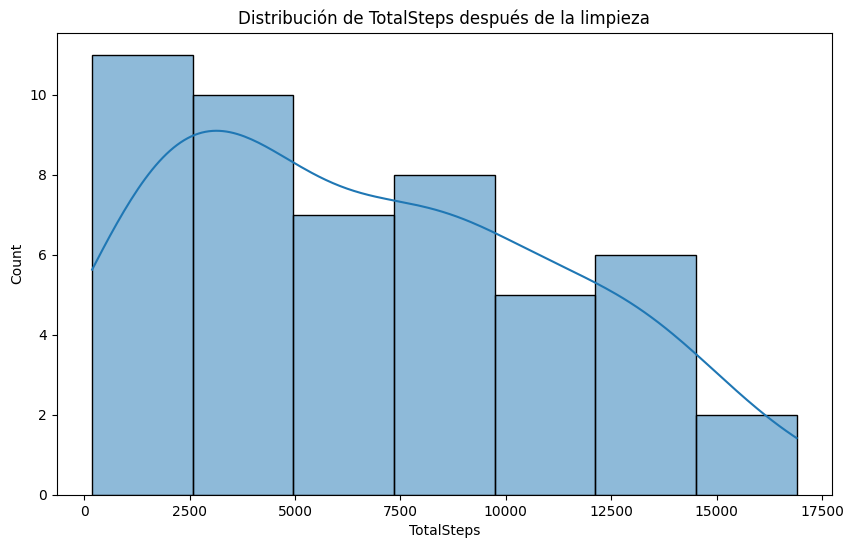


TotalDistance
W = 0.9236027800874722
p-value = 0.0035677427560245343


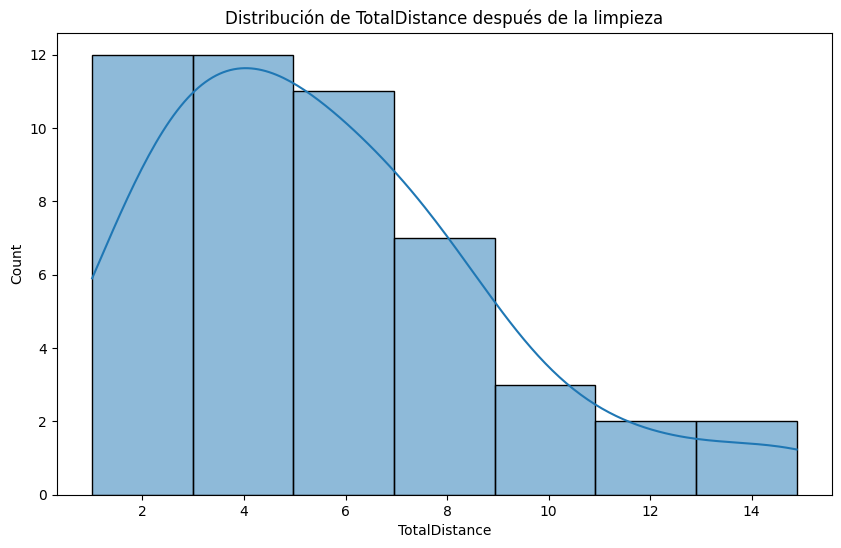


VeryActiveDistance
W = 0.7828206570540432
p-value = 4.418261103195067e-07


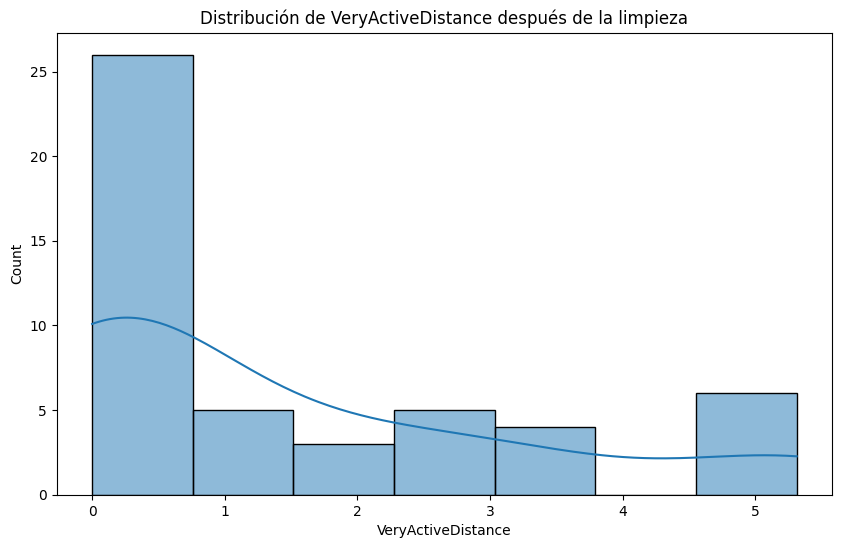


ModeratelyActiveDistance
W = 0.766712075773918
p-value = 2.006600107465413e-07


KeyboardInterrupt: 

In [9]:
for x in df.columns:
    test = df[x].sample(49)
    W, p_value = shapiro(test)
    print(x)    
    print(f"W = {W}")
    print(f"p-value = {p_value}")
    plt.figure(figsize=(10, 6))  
    sns.histplot(test, kde=True) 
    plt.title(f'Distribución de {x} después de la limpieza') 
    plt.show() 
    print()

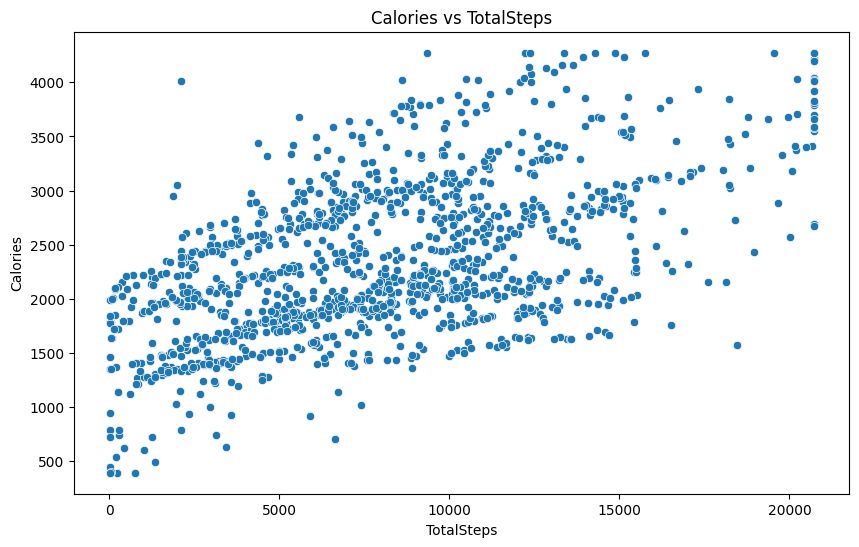

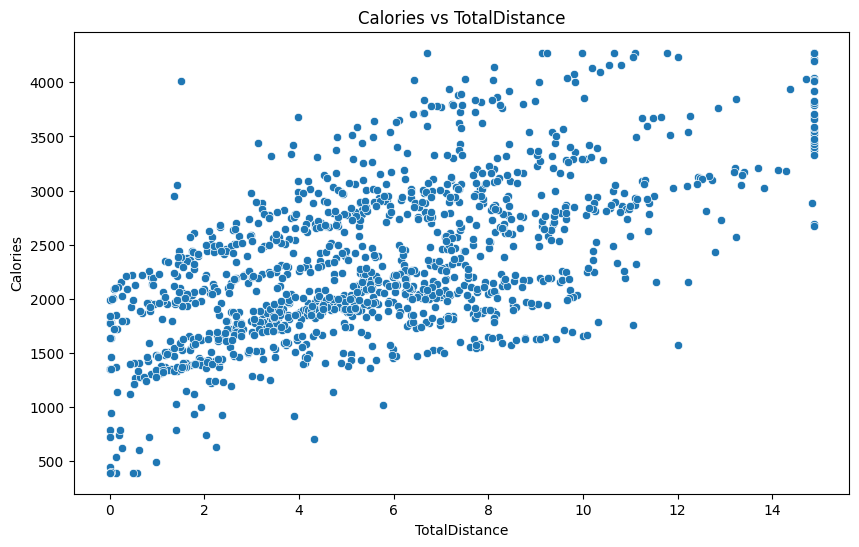

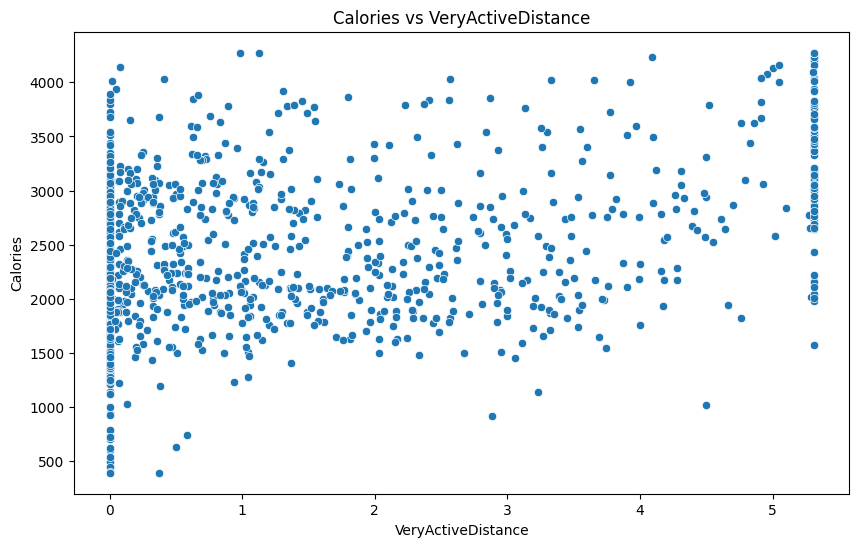

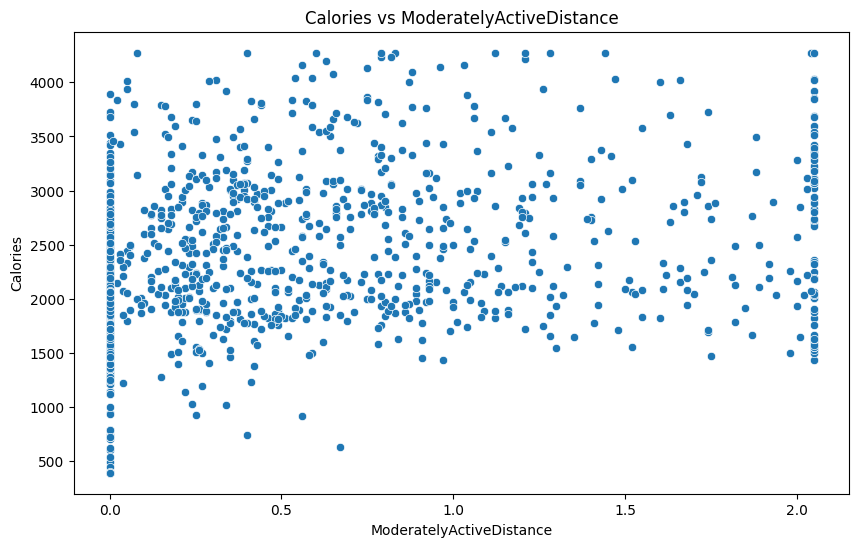

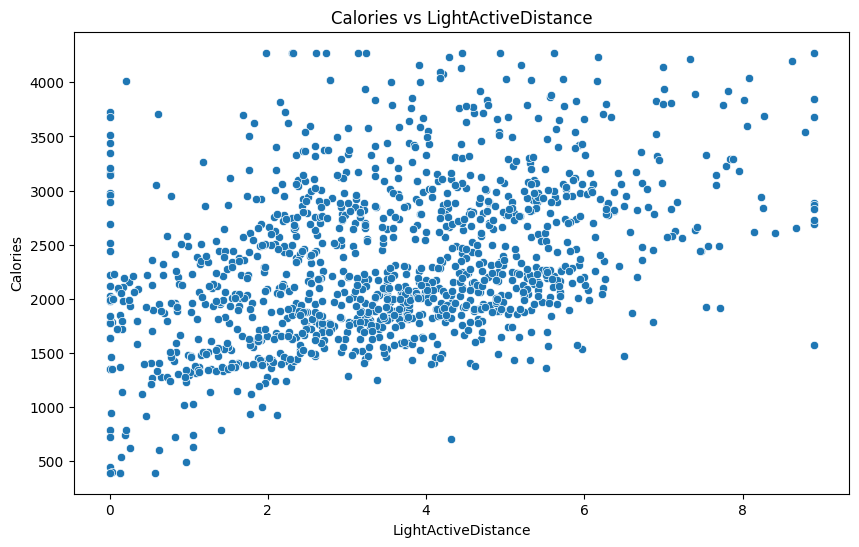

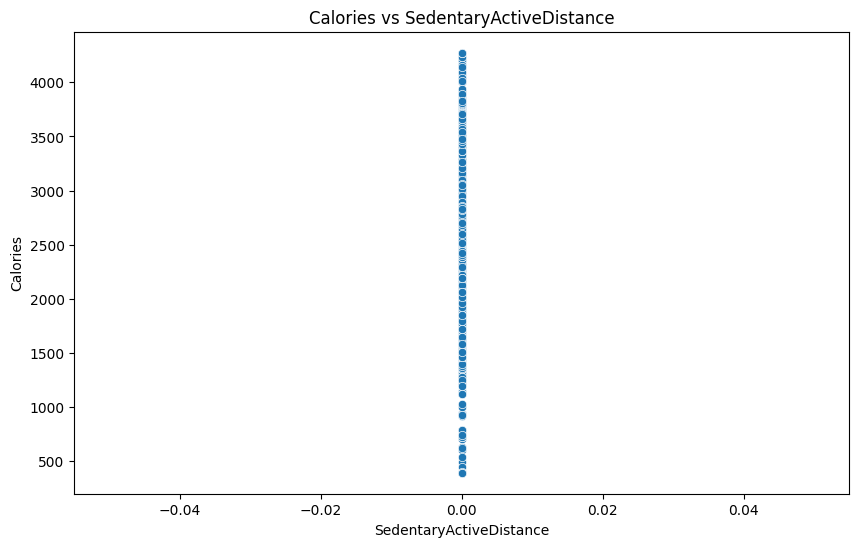

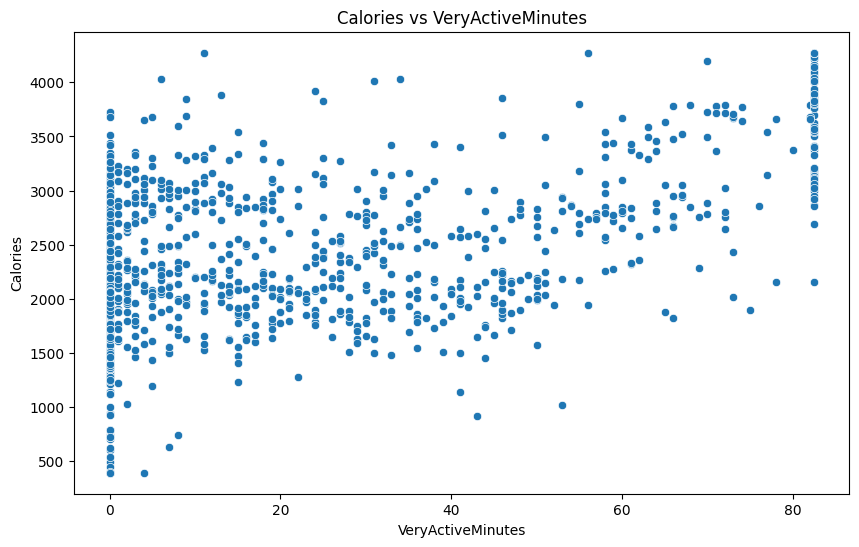

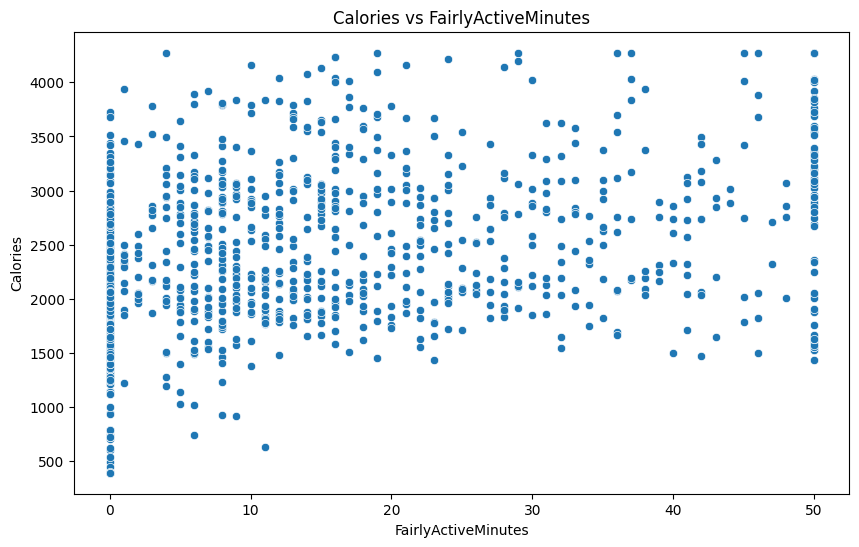

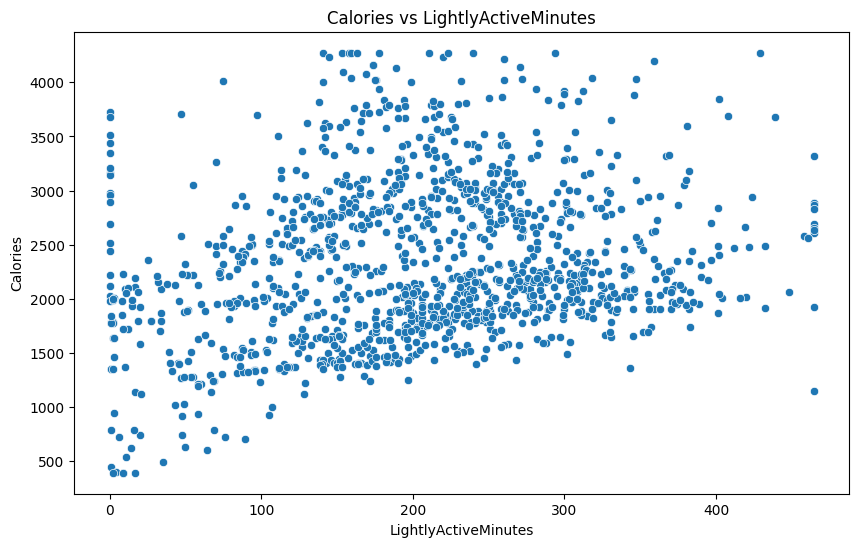

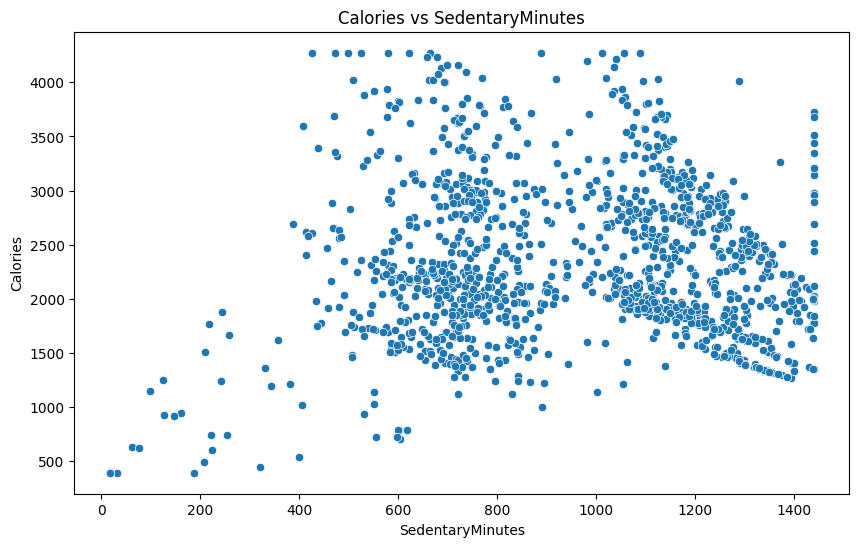

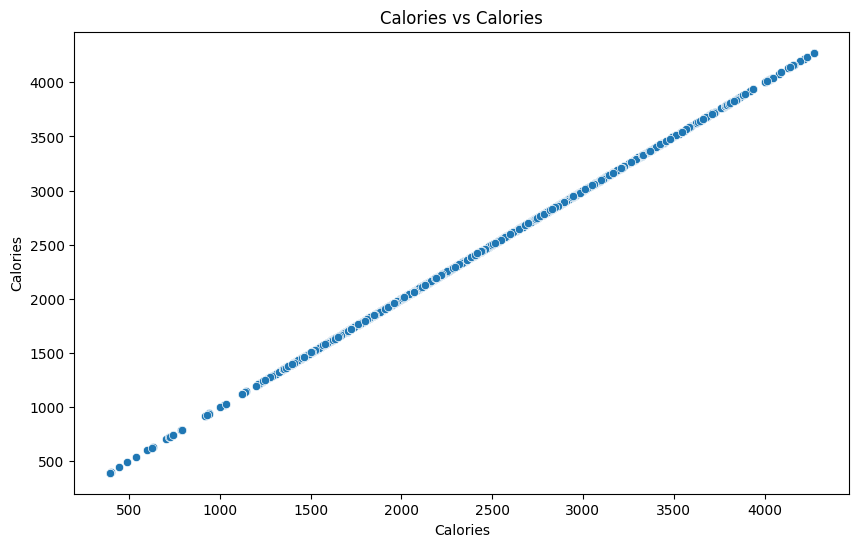

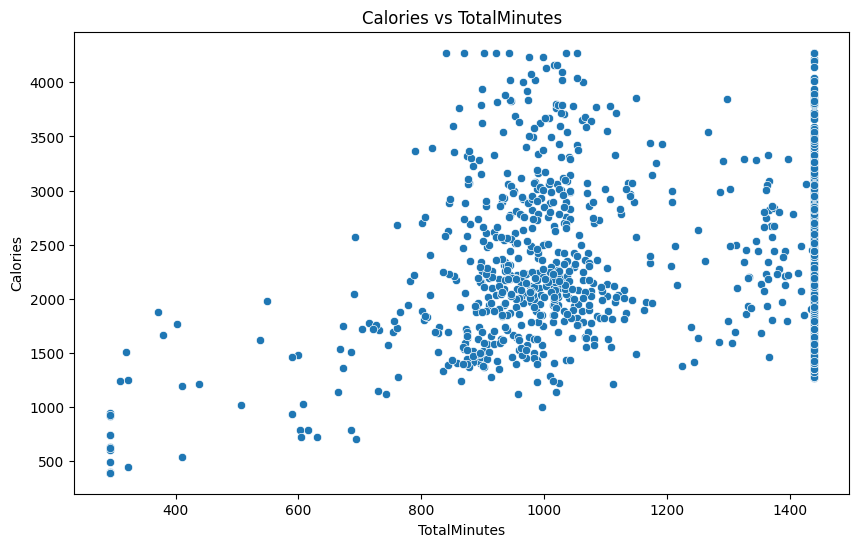

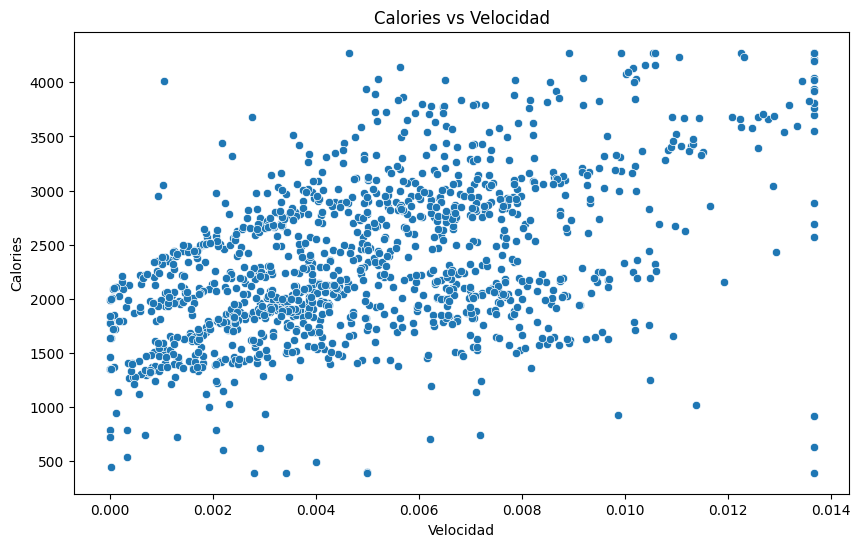

In [ ]:
import seaborn as sns

# Identificar las columnas que terminan en "Minutes"
minutes_columns = [col for col in df.columns if col.endswith('Minutes')]

# Iterar sobre las columnas identificadas y generar un gráfico de puntos
for column in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=f'{column}', y='Calories', data=df)
    plt.title(f'Calories vs {column}')
    plt.show()

## Matriz de Correlación

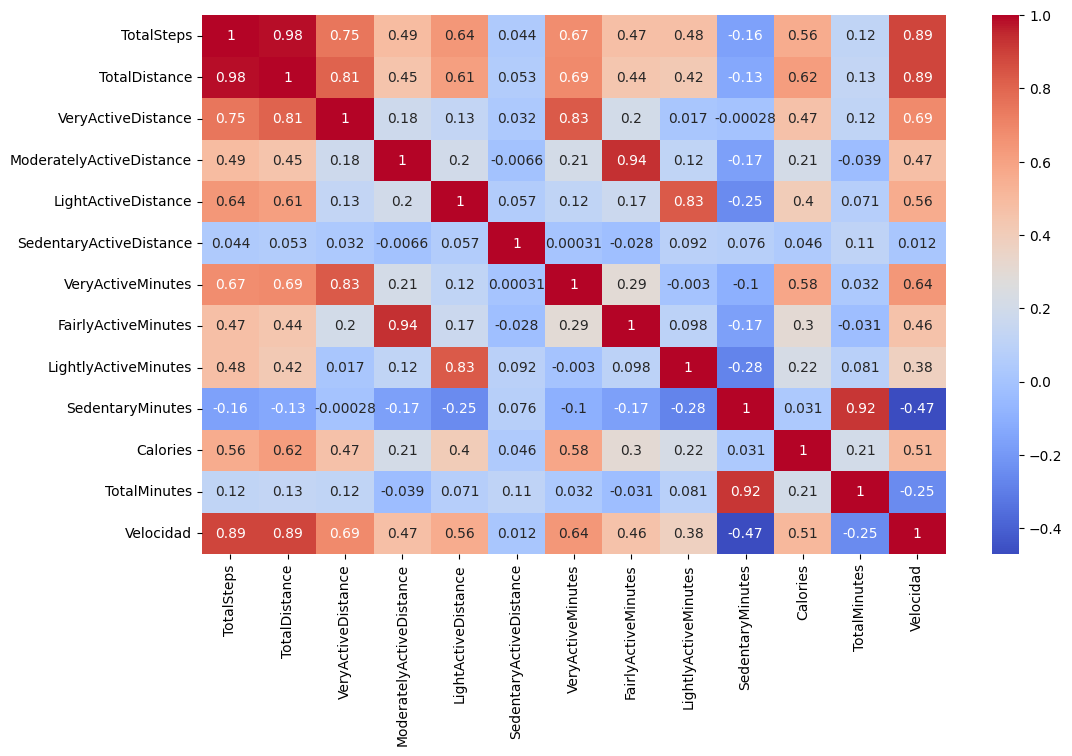

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
# print(correlation_matrix)

fig, ax = plt.subplots(figsize=(12, 7)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


## Modelos de Regresion Lineal

### Modelo 1

Vamos a hacer el análisis con todas las variables para intentar predecir Calorías

In [12]:
from sklearn.model_selection import train_test_split

# Asumiendo que 'df' es tu DataFrame y que 'Calories' es la columna objetivo
X = df.drop('Calories', axis=1) # Variables independientes
X = X.drop('Velocidad', axis=1)
X = X.drop('TotalMinutes', axis=1)
y = df['Calories'] # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
import statsmodels.api as sm

# Añadir una constante a X para el modelo lineal
X_train = sm.add_constant(X_train)

# Crear y entrenar el modelo
model = sm.OLS(y_train, X_train).fit()

# Imprimir un resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     285.1
Date:                Fri, 12 Apr 2024   Prob (F-statistic):          4.19e-284
Time:                        17:59:50   Log-Likelihood:                -7409.5
No. Observations:                1007   AIC:                         1.484e+04
Df Residuals:                     996   BIC:                         1.490e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [14]:
# Añadir una constante a X_test para el modelo lineal
X_test = sm.add_constant(X_test)

# Hacer predicciones con el modelo entrenado
predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Error Cuadrático Medio: {mse}")
print(f"Coeficiente de Determinación R^2: {r2}")

Error Cuadrático Medio: 135438.67855833995
Coeficiente de Determinación R^2: 0.6943213111544373


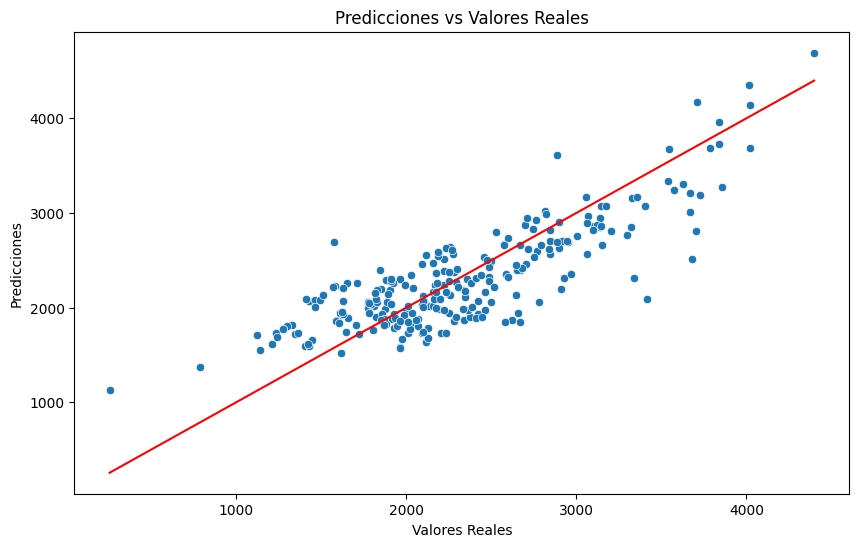

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'y_test' son los valores reales y 'predictions' son las predicciones del modelo
# Crear un DataFrame para facilitar la visualización
data = pd.DataFrame({'Real': y_test, 'Predicted': predictions})

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Real', y='Predicted', data=data)

# Añadir una línea de identidad para visualizar la alineación de las predicciones con los valores reales
sns.lineplot(x='Real', y='Real', data=data, color='red')

# Añadir títulos y etiquetas
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Mostrar el gráfico
plt.show()

### Modelo 2

Hagamos el análisis eliminando las variables independientes a Calorías

In [9]:
from sklearn.model_selection import train_test_split

# Asumiendo que 'df' es tu DataFrame y que 'Calories' es la columna objetivo
X = df.drop('Calories', axis=1)
X = X.drop('SedentaryActiveDistance', axis=1)
X = X.drop('SedentaryMinutes', axis=1)
y = df['Calories']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
import statsmodels.api as sm

# Añadir una constante a X para el modelo lineal
X_train = sm.add_constant(X_train)

# Crear y entrenar el modelo
model = sm.OLS(y_train, X_train).fit()

# Imprimir un resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     286.8
Date:                Fri, 12 Apr 2024   Prob (F-statistic):          4.71e-285
Time:                        17:59:13   Log-Likelihood:                -7407.3
No. Observations:                1007   AIC:                         1.484e+04
Df Residuals:                     996   BIC:                         1.489e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [11]:
# Añadir una constante a X_test para el modelo lineal
X_test = sm.add_constant(X_test)

# Hacer predicciones con el modelo entrenado
predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Error Cuadrático Medio: {mse}")
print(f"Coeficiente de Determinación R^2: {r2}")

Error Cuadrático Medio: 134346.30797828847
Coeficiente de Determinación R^2: 0.6967867398650385


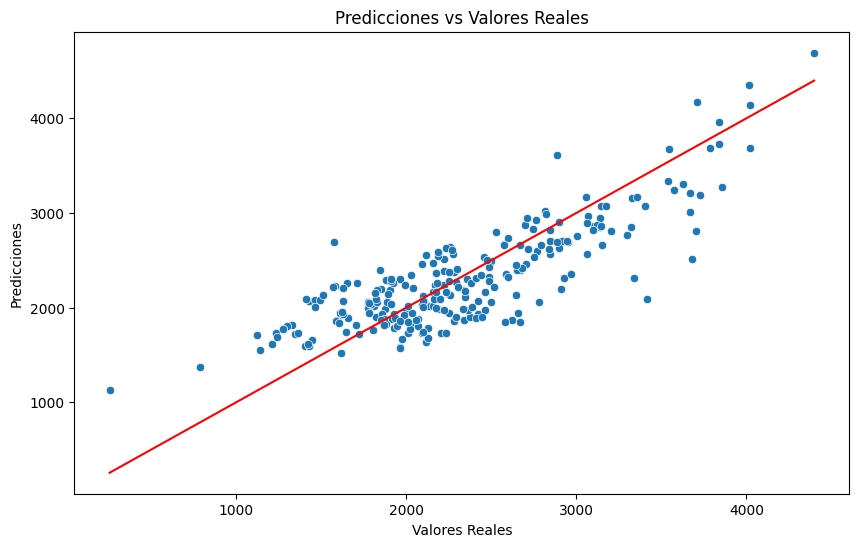

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'y_test' son los valores reales y 'predictions' son las predicciones del modelo
# Crear un DataFrame para facilitar la visualización
data = pd.DataFrame({'Real': y_test, 'Predicted': predictions})

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Real', y='Predicted', data=data)

# Añadir una línea de identidad para visualizar la alineación de las predicciones con los valores reales
sns.lineplot(x='Real', y='Real', data=data, color='red')

# Añadir títulos y etiquetas
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Mostrar el gráfico
plt.show()

## Análisis de residuos

### Code

In [16]:
residuos = model.resid

In [17]:
import numpy as np

media_residuos = np.mean(residuos)
suma_residuos = np.sum(residuos)

print(f"Media de los residuos: {media_residuos}")

if np.isclose(media_residuos, 0):
    print("La media de los residuos es cero.")
else:
    print("La media de los residuos no es cero.")

print(f"Suma de los residuos: {suma_residuos}")

if np.isclose(suma_residuos, 0):
    print("La suma de los residuos es cero.")
else:
    print("La suma de los residuos no es cero.")


Media de los residuos: -1.6257104897629303e-12
La media de los residuos es cero.
Suma de los residuos: -1.6370904631912708e-09
La suma de los residuos es cero.


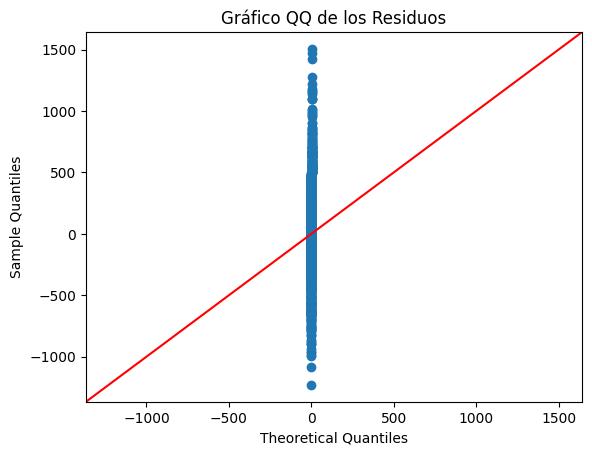

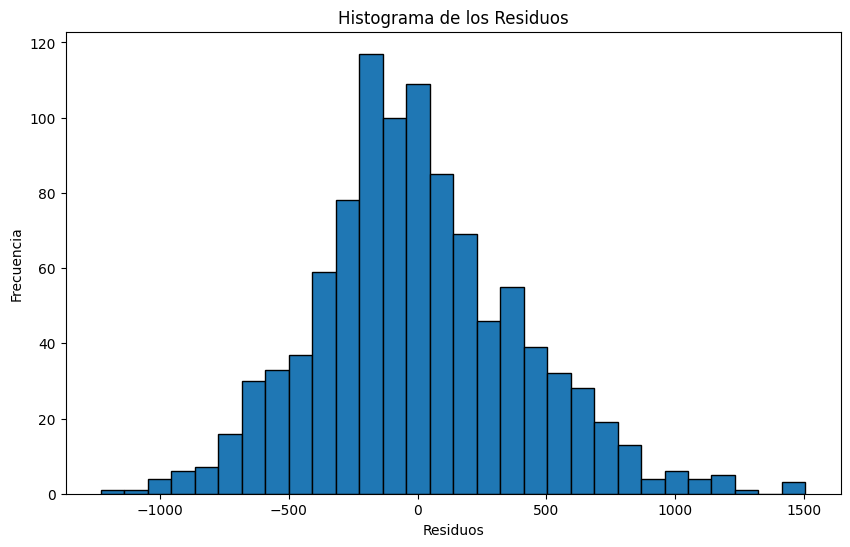

In [ ]:
from scipy.stats import kstest

# Gráfico QQ de los residuos
fig = sm.qqplot(residuos, line='45')
plt.title('Gráfico QQ de los Residuos')
plt.show()

# Histograma de los residuos
plt.figure(figsize=(10, 6))
plt.hist(residuos, bins=30, edgecolor='k')
plt.title('Histograma de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

Como vemos los residuos del modelo no siguen una distribución normal, esto puede tener varias implicaciones:

- Inferencias estadísticas: Muchos métodos estadísticos, incluyendo la regresión lineal y ANOVA, asumen que los residuos son normalmente distribuidos. Si esta suposición se viola, las inferencias estadísticas (como los intervalos de confianza y las pruebas de hipótesis) que se basan en el modelo pueden no ser válidas.
- Eficiencia del modelo: Un modelo con residuos no normales puede no ser el modelo más eficiente para los datos. Es posible que exista otro modelo que se ajuste mejor a estos.
- Violación de otros supuestos: Los residuos no normales a menudo indican que se están violando otros supuestos del modelo. Por ejemplo, podrían sugerir que la relación entre las variables no es lineal, o que la varianza de los residuos no es constante (heterocedasticidad).

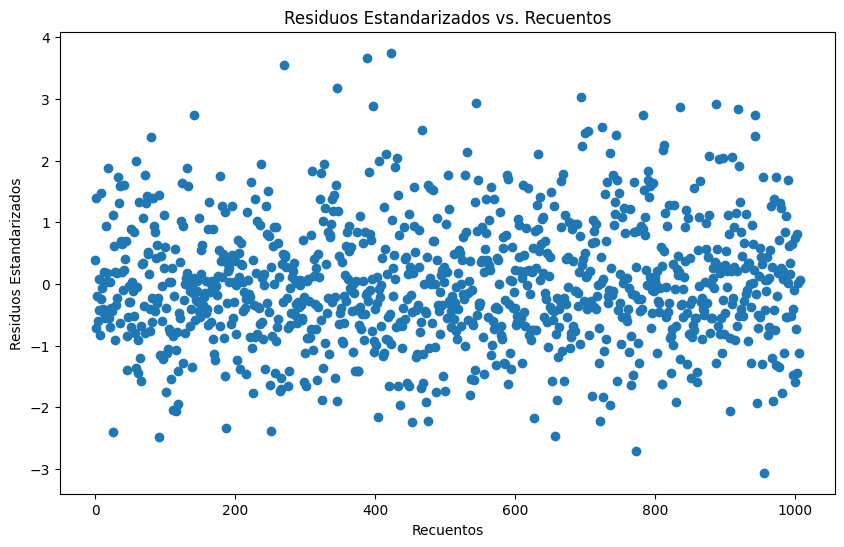

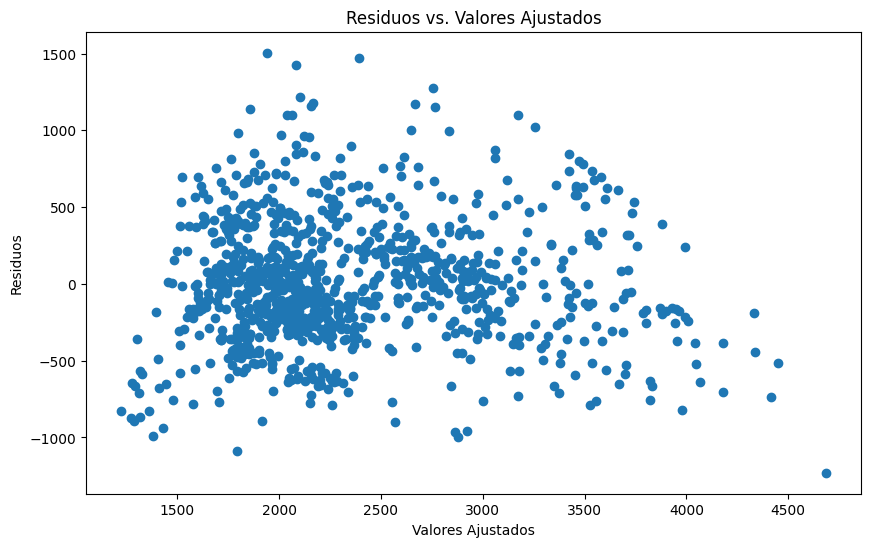

[('Lagrange multiplier statistic', 104.66218303270921), ('p-value', 6.332058386089152e-18), ('f-value', 11.55260616815721), ('f p-value', 6.027394293488593e-19)]


In [ ]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

# Calcular los residuos estandarizados
residuos_estandarizados = residuos / np.std(residuos)

# Gráfico de residuos estandarizados contra recuentos
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuos_estandarizados)), residuos_estandarizados)
plt.title('Residuos Estandarizados vs. Recuentos')
plt.xlabel('Recuentos')
plt.ylabel('Residuos Estandarizados')
plt.show()

# Gráfico de residuos vs. valores ajustados
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, residuos)
plt.title('Residuos vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.show()


# Realizar el test de Breusch-Pagan
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)

# Imprimir los resultados del test
print(lzip(names, test))

### Test de Kolmogorov-Smirnov

In [ ]:
# Realizar la prueba del Kolmogorov-Smirnov para verificar la normalidad de los residuos
D, p_value = kstest(residuos, 'norm')

print(f"D = {D}, p-value = {p_value}")

if p_value > 0.05:
    print("Los residuos parecen estar normalmente distribuidos.")
else:
    print("Los residuos no parecen estar normalmente distribuidos.")

D = 0.5254984447383063, p-value = 1.2833601991421145e-259
Los residuos no parecen estar normalmente distribuidos.


### Conclusiones de los residuos del modelo 1

Los residuos no están normalmente distribuidos

## PCA

Aplicando la técnica PCA (Principal Component Analysis) vamos a reducir la dimensionalidad de los datos

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Primero estandarizamos los datos para asegurarnos de que estaremos trabajando con datos en la misma escala

In [ ]:
# Seleccionamos las variables que vamos a analizar
pca_data = df[['TotalSteps', 'Velocidad', 'TotalMinutes', 'TotalDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']]


scaler = StandardScaler()
scaled_results = scaler.fit_transform(pca_data)

pca_data.columns

Index(['TotalSteps', 'Velocidad', 'TotalMinutes', 'TotalDistance',
       'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [19]:
# Aplicando PCA
pca = PCA()
pca_results = pca.fit_transform(scaled_results)
print(pca_results)

NameError: name 'PCA' is not defined

Se realiza un análisis de los componentes principales y para cada uno de los dos primeros se identifican las cinco características más importantes. Esto se hace tomando el valor absoluto de cada componente principal y seleccionando las cinco características con los valores más altos. Esto es útil porque nos permite entender qué características contribuyen más a cada componente principal.

In [ ]:
# Análisis de los componentes principales
principal_components = pd.DataFrame(pca.components_, columns=pca_data.columns)

# Identificar características más importantes para los primeros dos componentes principales
principal_component1 = principal_components.iloc[0]
principal_component2 = principal_components.iloc[1]

# Obtener las características más importantes para el primer componente principal (PC1)
pc1_characteristics = principal_component1.abs().nlargest(principal_component1.size).index
max1 = principal_component1.abs().nlargest(1).values
print("Las 5 características más importantes para el primer componente principal (PC1) son:")
for i, characteristic in enumerate(pc1_characteristics, start=1):
    if abs(principal_component1[characteristic]) > max1/2:
        print(f"{i}. {characteristic}")

# Obtener las características más importantes para el segundo componente principal (PC2)
pc2_characteristics = principal_component2.abs().nlargest(principal_component2.size).index
max2 = principal_component2.abs().nlargest(1).values
print("\nLas 5 características más importantes para el segundo componente principal (PC2) son:")
for i, characteristic in enumerate(pc2_characteristics, start=1):
    if abs(principal_component2[characteristic]) > max2/2:
        print(f"{i}. {characteristic}")


Las 5 características más importantes para el primer componente principal (PC1) son:
1. TotalDistance
2. TotalSteps
3. Velocidad
4. VeryActiveDistance
5. VeryActiveMinutes
6. FairlyActiveMinutes
7. ModeratelyActiveDistance
8. Calories
9. LightActiveDistance

Las 5 características más importantes para el segundo componente principal (PC2) son:
1. SedentaryMinutes
2. TotalMinutes


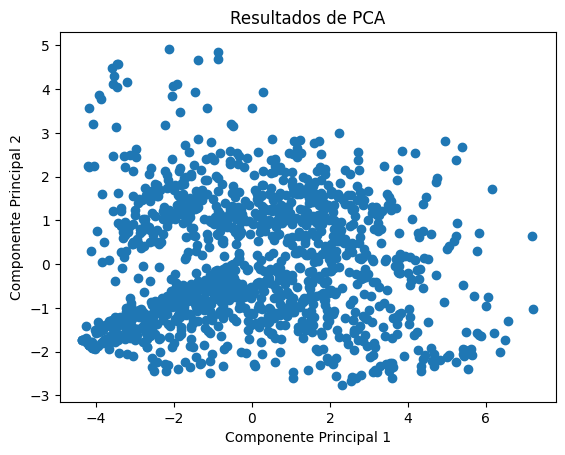

In [ ]:
# Visualizar los resultados de PCA
plt.scatter(pca_results[:, 0], pca_results[:, 1])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Resultados de PCA')
plt.show()

A través del cálculo de la varianza explicada por cada componente nos da una idea acerca de cuánta variación es capturada por cada componente principal

Varianza explicada:
Componente principal 1: 48.69%
Componente principal 2: 17.48%

Varianza acumulada:
Hasta el componente principal 1: 48.69%
Hasta el componente principal 2: 66.17%


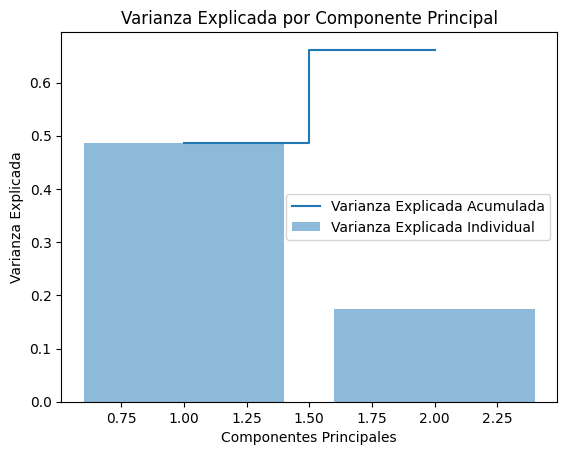

In [ ]:
# Calcular la varianza explicada
explained_variance = pca.explained_variance_ratio_
acum_variance = np.cumsum(explained_variance)

print("Varianza explicada:")
for i, varianza in enumerate(explained_variance, start=1):
    print(f"Componente principal {i}: {varianza:.2%}")

print("\nVarianza acumulada:")
for i, varianza_acum in enumerate(acum_variance, start=1):
    print(f"Hasta el componente principal {i}: {varianza_acum:.2%}")

# Visualizar la varianza explicada
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Varianza Explicada Individual')
plt.step(range(1, len(explained_variance) + 1), acum_variance, where='mid', label='Varianza Explicada Acumulada')
plt.xlabel('Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componente Principal')
plt.legend()
plt.show()

Realizamos un análisis de los componentes principales y se visualizamos la importancia de las características en cada componente principal a través de un mapa de calor.

Componentes principales 1 y 2:
  TotalSteps    Velocidad    TotalMinutes    TotalDistance    VeryActiveDistance    ModeratelyActiveDistance    LightActiveDistance    SedentaryActiveDistance    VeryActiveMinutes    FairlyActiveMinutes    LightlyActiveMinutes    SedentaryMinutes    Calories
------------  -----------  --------------  ---------------  --------------------  --------------------------  ---------------------  -------------------------  -------------------  ---------------------  ----------------------  ------------------  ----------
   0.397563      0.383514     -0.00586159        0.398954               0.310493                   0.271057                0.263624               -0                       0.308288              0.273784                 0.199016           -0.120971    0.268413
  -0.0637287     0.149344     -0.628509         -0.0825263             -0.194464                   0.0594626               0.12469                 2.58494e-26            -0.187499             

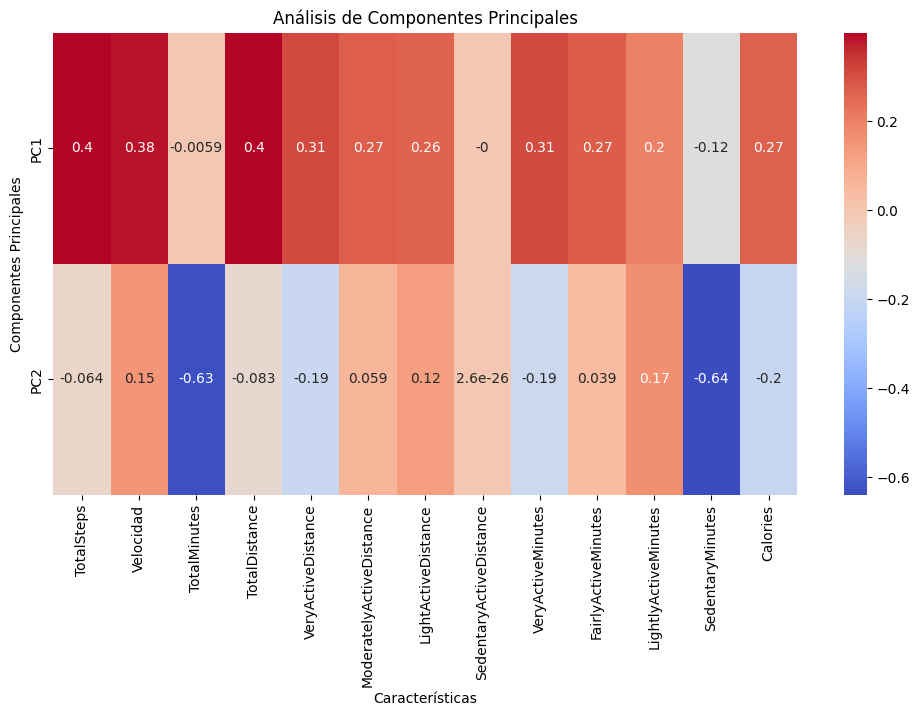

In [ ]:
from tabulate import tabulate

# Seleccionar solo los componentes principales 1 y 2
principal_components_1_2 = principal_components.iloc[:2]

# Convertir el DataFrame de componentes principales 1 y 2 en una lista de listas para tabulate
principal_components_1_2_lista = principal_components_1_2.values.tolist()

# Obtener los nombres de las características originales como encabezados de la tabla
encabezados = principal_components_1_2.columns.tolist()

# Imprimir los componentes principales 1 y 2 en forma de tabla
print("Componentes principales 1 y 2:")
print(tabulate(principal_components_1_2_lista, headers=encabezados))

plt.figure(figsize=(12, 6))
sns.heatmap(principal_components, annot=True, cmap='coolwarm', yticklabels=['PC1', 'PC2'], xticklabels=pca_data.columns)
plt.title('Análisis de Componentes Principales')
plt.xlabel('Características')
plt.ylabel('Componentes Principales')
plt.show()
